In [1]:
import ROOT, sys
import cppyy
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

ROOT.gStyle.SetPadRightMargin(0.01)
ROOT.gStyle.SetPadLeftMargin(0.075)
ROOT.gStyle.SetPadBottomMargin(0.12)

ROOT.gStyle.SetOptFit(1)

ROOT.TH1.AddDirectory(0)


fname =  "/work/clas12/kenjo/trains/root/eFPimFPip/lvl1_epimpip*"
rdf = ROOT.RDataFrame("h22",fname)

vals = "pe,the,fie,ppip,thpip,fipip,ppim,thpim,fipim,angPimPip,phi_t"
vals += ",angPimPip_LF,angPimPip_CM"
vals += ",Q2,xb,ww,mt"
vals += ",mmpro,misse"
vals += ",mrho,rhoPhi_CM"
vals += ",proe,thpro,fipro,rhoe,thrho,firho"
vals += ",normPhi,normTheta"
vals += ",normCMPhi,normCMTheta,elePX,eps1,eps2,eps,y,gamma"

rdf = rdf.Define("vals","""
double E0 = 10.6041, Mpro = 0.938272, Mele = 0.000511, Mpi = 0.13957, Mpi0 = 0.1349769;
TLorentzVector beam, targ;
beam.SetXYZM(0,0,E0,Mele);
targ.SetXYZM(0,0,0,Mpro);


TLorentzVector ele, pip, pim;
ele.SetXYZM(ex, ey, ez, Mele);
//pro.SetXYZM(prox, proy, proz, Mpro);
pip.SetXYZM(pipx, pipy, pipz, Mpi);
pim.SetXYZM(pimx, pimy, pimz, Mpi);

auto dppC = [&](float Px, float Py, float Pz, int sec, int ivec){

        // ivec = 0 --> Electron Corrections
        // ivec = 1 --> π+ Corrections
        // ivec = 2 --> π- Corrections (NOT UPDATED YET)
        // ivec = 3 --> Proton Corrections (NOT UPDATED YET)

        // Momentum Magnitude
        double pp = sqrt(Px*Px + Py*Py + Pz*Pz);

        // Initializing the correction factor
        double dp = 0;

        // Defining Phi Angle
        double Phi = (180/3.1415926)*atan2(Py, Px);

        // (Initial) Shift of the Phi Angle (done to realign sectors whose data is separated when plotted from ±180˚)
        if(((sec == 4 || sec == 3) && Phi < 0) || (sec > 4 && Phi < 90)){
            Phi += 360;
        }

        // Getting Local Phi Angle
        double PhiLocal = Phi - (sec - 1)*60;

        // Applying Shift Functions to Phi Angles (local shifted phi = phi)
        double phi = PhiLocal;

        // For Electron Shift
        if(ivec == 0){
            phi = PhiLocal - 30/pp;
        }

        // For π+ Pion/Proton Shift
        if(ivec == 1 || ivec == 3){
            phi = PhiLocal + (32/(pp-0.05));
        }

        // For π- Pion Shift
        if(ivec == 2){
            phi = PhiLocal - (32/(pp-0.05));
        }
        
          
        //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //==================================================================================================================================//
        //=======================//=======================//     Electron Corrections     //=======================//=======================//
        //==================================================================================================================================//
        //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

         if(ivec == 0){
            if(sec == 1){
                // The CONTINUOUS QUADRATIC function predicted for ∆p_{El} for [Cor = Uncorrected][Sector 1] is:
                dp = ((-4.3303e-06)*phi*phi + (1.1006e-04)*phi + (-5.7235e-04))*pp*pp + ((3.2555e-05)*phi*phi + (-0.0014559)*phi + (0.0014878))*pp + ((-1.9577e-05)*phi*phi + (0.0017996)*phi + (0.025963));
            }
            if(sec == 2){
                // The CONTINUOUS QUADRATIC function predicted for ∆p_{El} for [Cor = Uncorrected][Sector 2] is:
                dp = ((-9.8045e-07)*phi*phi + (6.7395e-05)*phi + (-4.6757e-05))*pp*pp + ((-1.4958e-05)*phi*phi + (-0.0011191)*phi + (-0.0025143))*pp + ((1.2699e-04)*phi*phi + (0.0033121)*phi + (0.020819));
            }
            if(sec == 3){
                // The CONTINUOUS QUADRATIC function predicted for ∆p_{El} for [Cor = Uncorrected][Sector 3] is:
                dp = ((-5.9459e-07)*phi*phi + (-2.8289e-05)*phi + (-4.3541e-04))*pp*pp + ((-1.5025e-05)*phi*phi + (5.7730e-04)*phi + (-0.0077582))*pp + ((7.3348e-05)*phi*phi + (-0.001102)*phi + (0.057052));
            }
            if(sec == 4){
                // The CONTINUOUS QUADRATIC function predicted for ∆p_{El} for [Cor = Uncorrected][Sector 4] is:
                dp = ((-2.2714e-06)*phi*phi + (-3.0360e-05)*phi + (-8.9322e-04))*pp*pp + ((2.9737e-05)*phi*phi + (5.1142e-04)*phi + (0.0045641))*pp + ((-1.0582e-04)*phi*phi + (-5.6852e-04)*phi + (0.027506));
            }
            if(sec == 5){
                // The CONTINUOUS QUADRATIC function predicted for ∆p_{El} for [Cor = Uncorrected][Sector 5] is:
                dp = ((-1.1490e-06)*phi*phi + (-6.2147e-06)*phi + (-4.7235e-04))*pp*pp + ((3.7039e-06)*phi*phi + (-1.5943e-04)*phi + (-8.5238e-04))*pp + ((4.4069e-05)*phi*phi + (0.0014152)*phi + (0.031933));
            }
            if(sec == 6){
                // The CONTINUOUS QUADRATIC function predicted for ∆p_{El} for [Cor = Uncorrected][Sector 6] is:
                dp = ((1.1076e-06)*phi*phi + (4.0156e-05)*phi + (-1.6341e-04))*pp*pp + ((-2.8613e-05)*phi*phi + (-5.1861e-04)*phi + (-0.0056437))*pp + ((1.2419e-04)*phi*phi + (4.9084e-04)*phi + (0.049976));
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //======================//======================//     Electron Corrections (End)     //======================//======================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=========================//=========================//     π+ Corrections     //=========================//=========================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        if(ivec == 1){
            if(sec == 1){
                dp =   ((-1.243e-06)*phi*phi +  (2.389e-05)*phi +  (0.0005821))*pp*pp +    ((9.9053e-06)*phi*phi + (0.000330123)*phi +  (-0.00699881))*pp + ((-1.64499e-05)*phi*phi +   (-0.0003863742)*phi + (0.014781467));
            }
            if(sec == 2){
                dp = ((-3.2862e-07)*phi*phi + (2.95543e-05)*phi +  (0.00090739))*pp*pp +  ((1.79154e-06 )*phi*phi +   (5.1856e-05)*phi +   (-0.0100764))*pp + ((-3.94192e-06)*phi*phi +   (-0.000381369)*phi + (0.0190516));
            }
            if(sec == 3){
                dp =   ((1.614272e-06)*phi*phi +   (-1.15731e-05)*phi +  (-0.000134606))*pp*pp +    ((-6.4147e-06)*phi*phi +  (-2.53892e-05)*phi +  (-0.00067489))*pp +   ((3.8283e-06)*phi*phi + (-2.2494e-05)*phi + (0.00392674 ));
            }
            if(sec == 4){
                dp =   ((7.8134e-07)*phi*phi + (-2.01378e-05)*phi + (0.00027775))*pp*pp +   ((2.826e-06)*phi*phi +  (0.0001354018)*phi +  (-0.00442238))*pp + ((-1.14346e-05)*phi*phi +  (-0.000114639)*phi + (0.01140008));
            }
            if(sec == 5){
                dp =  ((2.18682e-06)*phi*phi + (1.3514e-06)*phi + (0.000208946))*pp*pp + ((-6.6705e-06)*phi*phi +  (5.27125e-05)*phi + (-0.00462579))*pp +   ((6.124e-07)*phi*phi +  (-0.000150985)*phi + (0.0072238));
            }
            if(sec == 6){
                dp =  ((2.76914e-06)*phi*phi +  (-4.62828e-05)*phi +  (0.0003850303))*pp*pp +    ((-1.30164e-05)*phi*phi + (0.000312041)*phi +  (-0.00172819))*pp +  ((1.50637e-05)*phi*phi +  (-0.000307918)*phi + (0.00271625));
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=========================//=========================//  π+ Corrections (End)  //=========================//=========================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //==================//==================//    π- Corrections (Updated as of 11-21-2022)    //==================//==================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////



         if(ivec == 2){
            if(sec == 1){
                
                dp = (-9.2163e-07*phi*phi + 3.1862e-06*phi +2.9805e-03)*pp*pp +(1.0435e-05*phi*phi + -8.7298e-05 *phi +-1.7730e-02)*pp +-1.5154e-05*phi*phi + -1.3716e-04*phi + 2.2410e-02;
            
            
            }
            if(sec == 2){
                dp =(-1.9656e-06*phi*phi + 9.7389e-05*phi + 4.1250e-03)*pp*pp +(1.6439e-06*phi*phi + -4.6007e-04*phi + -1.9809e-02)*pp  + 3.5794e-07*phi*phi + 4.8250e-04*phi + 1.7333e-02;
            
            }

            if(sec == 3){
                dp =(2.5351e-06*phi*phi + 4.1043e-05*phi +3.1157e-03)*pp*pp +(-1.3573e-05*phi*phi +-1.7609e-04*phi +-1.6759e-02)*pp  + 1.4647e-05*phi*phi + 1.7484e-04*phi +1.3805e-02;
            }

            if(sec == 4){
                dp =(2.3500e-06*phi*phi + -7.7894e-05*phi + 4.4837e-03)*pp*pp +(-9.7915e-06*phi*phi + 4.6576e-04*phi + -2.6809e-02)*pp  + 1.3819e-05*phi*phi + 5.6017e-04*phi + 3.0320e-02;

            }

            if(sec == 5){
                dp =(-2.1809e-06*phi*phi + 2.4948e-05*phi + 2.7995e-03)*pp*pp +(6.3908e-06*phi*phi + -6.5122e-05*phi + -1.7571e-02)*pp + -1.9146e-06*phi*phi + -6.3799e-05*phi + 2.0877e-02;
            
            }

            if(sec == 6){
                dp =(-9.3043e-06*phi*phi + 6.2678e-05*phi + 5.9660e-03)*pp*pp +(4.0581e-05*phi*phi + -3.0537e-04*phi + -3.1485e-02)*pp  + -3.8345e-05*phi*phi + 2.0267e-04*phi + 3.3363e-02;
            
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=======================//=======================//      π- Corrections (End)      //=======================//=======================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

   return dp/pp;
    };
auto fe = dppC(ex, ey, ez, esec, 0) + 1;
auto fpip = dppC(pipx, pipy, pipz, pipsec, 1) + 1;
auto fpim = dppC(pimx, pimy, pimz, pimsec, 2) + 1;

TLorentzVector eleC, pipC, pimC;
eleC.SetXYZM(ex*fe, ey*fe, ez*fe, 0);
pipC.SetXYZM(pipx*fpip, pipy*fpip, pipz*fpip, 0.13957);
pimC.SetXYZM(pimx*fpim, pimy*fpim, pimz*fpim, 0.13957);


/*auto eleC = ROOT::Math::PxPyPzMVector;
auto pipC = ROOT::Math::PxPyPzMVector(pipx*fpip, pipy*fpip, pipz*fpip, 0.13957);
auto pimC = ROOT::Math::PxPyPzMVector(pimx*fpim, pimy*fpim, pimz*fpim, 0.13957);*/


ele = eleC;
pip = pipC;
pim = pimC;

TLorentzVector pro = (beam+targ-ele-pip-pim);

double pe = ele.P(), the=ele.Theta()*TMath::RadToDeg(), fie=ele.Phi()*TMath::RadToDeg();
double proe = pro.P(), thpro=pro.Theta()*TMath::RadToDeg(), fipro=pro.Phi()*TMath::RadToDeg();
double ppip = pip.P(), thpip=pip.Theta()*TMath::RadToDeg(), fipip=pip.Phi()*TMath::RadToDeg();
double ppim = pim.P(), thpim=pim.Theta()*TMath::RadToDeg(), fipim=pim.Phi()*TMath::RadToDeg();

double mrho = (pip+pim).M();
//double mdelta = (pro+pip).M();

//double mm2pip = (beam+targ-ele-pro-pim).M2();
//double mm2pim = (beam+targ-ele-pro-pip).M2();
double mmpro = (beam+targ-ele-pip-pim).M();
double misse = (beam+targ-ele-pip-pim).E();
//double mepx = (beam+targ-ele-pro).M();

auto q = (beam-ele);
double Q2 = - (beam-ele).M2();
double ww = (beam+targ-ele).M();
double xb = Q2/(ww*ww - targ.M2() + Q2);
double mt = - ((beam+targ-ele-pip-pim)-targ).M2();

double Theta_q = q.Theta();
double Phi_el = ele.Phi();

auto Rot_Matrix = [&](TLorentzVector vector, int Lab2CM_or_CM2Lab, double Theta_Rot, double Phi_Rot){ 

        double Rot_X1 = vector.X();
        double Rot_Y1 = vector.Y();
        double Rot_Z1 = vector.Z();

        double Rot_X = Rot_X1;
        double Rot_Y = Rot_Y1;
        double Rot_Z = Rot_Z1;



        // Lab2CM_or_CM2Lab is a parameter which determines if you rotating from the lab frame to the CM frame, or if you are rotating back in the opposite direction
        // Lab2CM_or_CM2Lab = -1 gives a rotation to the CM frame (from the lab frame)
        // Lab2CM_or_CM2Lab = +1 gives a rotation to the lab frame (from the CM frame)


        Theta_Rot = -1*Theta_Rot;   // Always give the angle of rotation Theta as the value given by .Theta()
                                    // This subroutine will handle the fact that the matrix rotation wants the negative of the angle of rotation


        // Rotation to Lab Frame
        if(Lab2CM_or_CM2Lab == -1){
            Rot_X = Rot_X1*TMath::Cos(Theta_Rot)*TMath::Cos(Phi_Rot) - Rot_Z1*TMath::Sin(Theta_Rot) + Rot_Y1*TMath::Cos(Theta_Rot)*TMath::Sin(Phi_Rot);
            Rot_Y = Rot_Y1*TMath::Cos(Phi_Rot) - Rot_X1*TMath::Sin(Phi_Rot);
            Rot_Z = Rot_Z1*TMath::Cos(Theta_Rot) + Rot_X1*TMath::Cos(Phi_Rot)*TMath::Sin(Theta_Rot) + Rot_Y1*TMath::Sin(Theta_Rot)*TMath::Sin(Phi_Rot);
        }


        // Rotation to CM Frame
        if(Lab2CM_or_CM2Lab == 1){
            Rot_X = Rot_X1*TMath::Cos(Theta_Rot)*TMath::Cos(Phi_Rot) + Rot_Z1*TMath::Cos(Phi_Rot)*TMath::Sin(Theta_Rot) - Rot_Y1*TMath::Sin(Phi_Rot);
            Rot_Y = Rot_Y1*TMath::Cos(Phi_Rot) + Rot_X1*TMath::Sin(Phi_Rot)*TMath::Cos(Theta_Rot) + Rot_Z1*TMath::Sin(Theta_Rot)*TMath::Sin(Phi_Rot);
            Rot_Z = Rot_Z1*TMath::Cos(Theta_Rot) - Rot_X1*TMath::Sin(Theta_Rot);
        }



        TLorentzVector vector_Rotated(Rot_X, Rot_Y, Rot_Z, vector.E());

        return vector_Rotated;


    };
    


auto angPimPip_LF = pim.Vect().Angle(pip.Vect())*TMath::RadToDeg();

auto rho = pip+pim;
double rhoe = rho.P(), thrho=rho.Theta()*TMath::RadToDeg(), firho=rho.Phi()*TMath::RadToDeg();



// Center of Mass Frame
auto beam_Clone = Rot_Matrix(beam, -1, Theta_q, Phi_el);
auto targ_Clone = Rot_Matrix(targ, -1, Theta_q, Phi_el);
auto ele_Clone  = Rot_Matrix(ele,  -1, Theta_q, Phi_el);
auto pip_Clone = Rot_Matrix(pip,  -1, Theta_q, Phi_el);
auto pim_Clone = Rot_Matrix(pim,  -1, Theta_q, Phi_el);
auto q_Clone = Rot_Matrix(q,  -1, Theta_q, Phi_el);
auto rho_Clone = Rot_Matrix(rho,  -1, Theta_q, Phi_el);
auto pro_Clone = Rot_Matrix(pro,  -1, Theta_q, Phi_el);








auto fCM = q_Clone + targ_Clone;
auto boost = -(fCM.BoostVector());


auto qlv_Boost(q_Clone);
auto ele_Boost(ele_Clone);
auto beamBoost(beam_Clone);
auto targBoost(targ_Clone);
auto pipBoost(pip_Clone);
auto pimBoost(pim_Clone);
auto rhoBoost(rho_Clone);
auto proBoost(pro_Clone);






qlv_Boost.Boost(boost);
ele_Boost.Boost(boost);
beamBoost.Boost(boost);
targBoost.Boost(boost);
pipBoost.Boost(boost);
pimBoost.Boost(boost);
rhoBoost.Boost(boost);
proBoost.Boost(boost);





auto rhoPhi_CM = rhoBoost.Vect().Phi()*TMath::RadToDeg();



auto angPimPip_CM = pimBoost.Vect().Angle(pipBoost.Vect())*TMath::RadToDeg();




TVector3 v0, v1;
v0 = qlv_Boost.Vect().Cross(ele_Boost.Vect());
v1 = qlv_Boost.Vect().Cross(pipBoost.Vect()+pimBoost.Vect());
Double_t c0, c1, c2, c3;
c0 = v0.Dot(pipBoost.Vect()+pimBoost.Vect());
c1 = v0.Dot(v1);
c2 = v0.Mag();
c3 = v1.Mag();


double phi_t = (c0/TMath::Abs(c0)) * TMath::ACos(c1 /(c2*c3))*TMath::RadToDeg();

if(phi_t < 0){
    phi_t = phi_t + 360;
}







auto normCM = rhoBoost.Vect();

auto normCMTheta = normCM.Theta()*TMath::RadToDeg();

auto normCMPhi = normCM.Phi()*TMath::RadToDeg();

if(normCMPhi < 0){
    normCMPhi = normCMPhi + 360;
}



// Rho Frame
auto Phi_rho =  rhoBoost.Phi();
auto Theta_rho = rhoBoost.Theta();

TLorentzVector rhoBoost_r;
rhoBoost_r.SetXYZM(rhoBoost.Vect().x(), rhoBoost.Vect().y(), rhoBoost.Vect().z(), 0.7754);

auto pip_Clone2 = Rot_Matrix(pipBoost,  -1, Theta_rho, Phi_rho);
auto pim_Clone2 = Rot_Matrix(pimBoost,  -1, Theta_rho, Phi_rho);
auto rho_Clone2 = Rot_Matrix(rhoBoost,  -1, Theta_rho, Phi_rho);
auto q_Clone2 = Rot_Matrix(qlv_Boost,  -1, Theta_rho, Phi_rho);

auto pro_Clone2 = Rot_Matrix(proBoost,  -1, Theta_rho, Phi_rho);



auto rhoB = pip_Clone2+pim_Clone2;

auto fCM2 = -rho_Clone2;//-(rhoB);
auto boost2 = -(fCM2.BoostVector());

auto pipBoost2(pip_Clone2);
auto pimBoost2(pim_Clone2);
auto rhoBoost2(rho_Clone2);
auto qBoost2(q_Clone2);
auto proBoost2(pro_Clone2);




pipBoost2.Boost(boost2);
pimBoost2.Boost(boost2);
rhoBoost2.Boost(boost2);
qBoost2.Boost(boost2);
proBoost2.Boost(boost2);





auto angPimPip = pimBoost2.Vect().Angle(pipBoost2.Vect())*TMath::RadToDeg();


auto b0 = pipBoost2.Vect().Mag();
auto b1 = rhoBoost.Vect().Mag();

auto normTheta = TMath::ACos((pipBoost2.Vect().Dot(rhoBoost.Vect()))/(b0*b1))*TMath::RadToDeg(); 


auto norm = rhoBoost.Vect().Cross(pipBoost2.Vect());
auto Y = qlv_Boost.Vect().Cross(rhoBoost.Vect());

auto a0 = norm.Mag();
auto a1 = Y.Mag();
auto a2 = Y.Dot(rhoBoost.Vect());

auto normPhi =  (a2/TMath::Abs(a2)) *TMath::ACos(norm.Dot(Y)/(a0*a1))*TMath::RadToDeg();







if(normPhi < 0){
    normPhi = normPhi + 360;
}


auto elePX = ele.Px();
auto y = targ.Dot(q)/targ.Dot(beam);
auto gamma = 2*Mpro*xb/TMath::Sqrt(Q2);
auto eps1 = (1-y-1/4*gamma*gamma*y*y);//
auto eps2 = (1-y+1/2*y*y+1/4*gamma*gamma*y*y);
auto eps = eps1/eps2;





return vector<double> {"""+vals+"};")




for iv, vname in enumerate(vals.split(',')):
    rdf = rdf.Define(vname, "vals[{}]".format(iv))
    
    
    
    
    
rdf = rdf.Filter("Q2>2 && ww>2")


print(ROOT.gROOT.GetVersion())

6.32.00


In [2]:
badBins = [[0,0,8],[0,1,8],[0,2,1],[0,2,6],[0,2,8],[0,3,2],[0,3,4],[0,3,5],
          [1,0,8],[1,2,4],[1,2,6],[1,3,2],[1,3,6],
          [2,0,4],[2,2,2],[2,2,5],[2,2,8],
          [3,0,7]]#,
          #[4,0,1],[4,0,3],[4,0,5], [4,1,4],[4,1,8]]
def test_BadBins(Q2,t,phi):
    temp = [Q2,t,phi]
    test = False
    for i in badBins:
        if temp == i:
            test = True
    return test
print(test_BadBins(1,0,8))
print(test_BadBins(1,0,6))

True
False


In [3]:
    cppyy.cppdef("""
        double breit_wigner_1(double *x, double *par) {
            double m = x[0];
            double amp = par[0];
            double m0 = par[1];
            double G0 = par[2];
            double mpi = 0.139; // Mass of pi+

            double p = TMath::Sqrt(m*m-4*mpi*mpi)/2;
            double p0 = TMath::Sqrt(m0*m0-4*mpi*mpi)/2;
            double Gamma = G0*TMath::Power(p / p0, 3);
            double gamma = TMath::Sqrt(m*m*(m0*m0 + Gamma*Gamma));

            double k1 = 2 * TMath::Sqrt(2) *m0* Gamma * gamma;
            double k2 = TMath::Pi() * TMath::Sqrt(m0*m0 + gamma);
            double k = k1 / k2;

            double bw1 = amp * k / ((m*m - m0*m0)*(m*m - m0*m0) + (Gamma*Gamma*m0*m0));
            return bw1;
        }

    """)

    cppyy.cppdef("""
            double breit_wigner_2(double *x, double *par) {
                double m = x[0];
                double amp = par[7];
                double mu = par[8];
                double gamma = par[9];

                return amp*TMath::BreitWigner(m, mu, gamma);


            }
    """)

    cppyy.cppdef("""
        double background(double *x, double *par) {
            double m = x[0];
            double amp_bkg = par[3];
            double xi = par[4];
            double m0_bkg = par[5];
            double m1_bkg = par[6];

            double A1 = m1_bkg-m;
            double A2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
            double A = A1/A2;

            double B1 = (m1_bkg-m)*(m1_bkg-m);
            double B2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
            double B = B1/B2;

            double C1 = (m1_bkg-m)*(m1_bkg-m);
            double C2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
            double C = C1/C2;

            double func;
            if(B < 1){
                func =xi*xi*xi*A*TMath::Sqrt(1-B)*TMath::Exp(-1/2*xi*xi*(1-C));
            } else {
                func = 0;
            }
            return  amp_bkg*func;
        }
    """)
    
    cppyy.cppdef("""
        double background_only(double *x, double *par) {
            double m = x[0];
            double amp_bkg = par[0];
            double xi = par[1];
            double m0_bkg = par[2];
            double m1_bkg = par[3];

            double A1 = m1_bkg-m;
            double A2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
            double A = A1/A2;

            double B1 = (m1_bkg-m)*(m1_bkg-m);
            double B2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
            double B = B1/B2;

            double C1 = (m1_bkg-m)*(m1_bkg-m);
            double C2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
            double C = C1/C2;

            double func;
            if(B < 1){
                func = xi*xi*xi*A*TMath::Sqrt(1-B)*TMath::Exp(-1/2*xi*xi*(1-C));
            } else {
                func = 0;
            }
            return amp_bkg*func;
        }
    """)



    cppyy.cppdef("""
            #include <cmath>
            #include "TMath.h"

            double total_function(double *x, double *par) {
            double m = x[0];
            double amp1 = par[0];
            double m01 = par[1];
            double G01 = par[2];


            double amp_bkg = par[3];
            double xi = par[4];
            double m0_bkg = par[5];
            double m1_bkg = par[6];

            double amp2 = par[7];
            double m02 = par[8];
            double G02 = par[9];

            // Evaluate the first Breit-Wigner function
            double bw1 = breit_wigner_1(x, par);

            double bkg = background(x,par);

            double bw2 = breit_wigner_2(x, par);

            //std::cout << bw1 << " " << bkg << " " << bw2 << endl;
            // Return the sum of the two Breit-Wigner functions and the background
            return bw1+ bkg + bw2;
            }
    """)

True

In [20]:
import numpy as np

ipar1 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12], dtype=np.int32) 
ipar2 = np.array([13,1,2,14,4,5,6,7,8,15,16,11,12],dtype=np.int32)

#ipart = np.array([[0,1,2,3,4,5,6,7,8,9,10,11,12],[13,1,2,14,4,5,6,7,8,15,16,11,12]], dtype=np.int32) 

def relativistic_breit_wigner(x, par):
    G0 = 1
    p0 = 0.13497
    
    pi = ROOT.TMath.Pi()
    amp = par[0]
    m = x[0]
    M0 = par[1]
    
    Gamma = G0*ROOT.TMath.Power(par[2]/p0,3)
    gamma = ROOT.TMath.Sqrt(m*m*(M0*M0+Gamma*Gamma))
    
    k1 = 2*ROOT.TMath.Sqrt(2)*M*Gamma*gamma
    k2 = pi*ROOT.TMath.Sqrt(M0*M0)+gamma
    k = k1/k2
    
    func = amp*k/((m*m-M0*M0)*(m*m-M0*M0)+(Gamma*Gamma*M0*M0))
    #print(func)
    return func
def bkg_func(x,par):
    amp = par[0]
    xi = par[1]
    m0 = par[2]
    m1 = par[3]
    
    A1 = m1-x[0]
    A2 = (m1-m0)*(m1-m0)
    A = A1/A2
    
    B1 = (m1-x[0])*(m1-x[0])
    B2 = (m1-m0)*(m1-m0)
    B = B1/B2
    
    C1 = (m1-x[0])*(m1-x[0])
    C2 = (m1-m0)*(m1-m0)
    C = C1/C2
    
    
    func = amp*xi*xi*xi*A*ROOT.TMath.Sqrt(1-B)*ROOT.TMath.Exp(-1/2*xi*xi*(1-C))
    
    return func
def sum_function(x, par):
    amp_rho = par[0]
    M0_rho = par[1]
    Gamma_rho = par[2]
    
    amp_f2 = par[3]
    M0_f2 = par[4]
    Gamma_f2 = par[5]
    
    
    bkg_1 = par[6]
    bkg_2 = par[7]
    bkg_3 = par[8]
    bkg_4 = par[9]
    #return bkg_func(x,[bkg_1,bkg_2,bkg_3])
    return relativistic_breit_wigner(x,[amp_rho,M0_rho,Gamma_rho]) + relativistic_breit_wigner(x, [amp_f2,M0_f2,Gamma_f2]) + bkg_func(x,[bkg_1,bkg_2,bkg_3,bkg_4])

par_Num = []
for i in range(0,2):
    if i == 0:
        n = [0,1,2,3,4,5,6,7,8,9]
    else:
        j = 10 + (i-1)*3
        #n = [j,1,2,j+1,4,5,j+2,7,8,j+3,10,11]
        n = [j,1,2,j+1,4,5,6,j+2,8,9]
    #print(n)
    par_Num.append(n)
print((par_Num))
ipart = np.array(par_Num, dtype=np.int32) 


#Custum class that makes a chi2 for both fits

class GlobalChi2(object):
    def __init__(self, f1,numOfHist):
        self._f1 = f1
        #self._f2 = f2
        self._numOfHist = numOfHist
    def __call__(self, par):
        # parameter vector is first background (in common 1 and 2) and then is
        # signal (only in 2)
 
        # the zero-copy way to get a numpy array from a double *
        par_arr = np.frombuffer(par, dtype=np.float64, count=self._numOfHist*len(ipar1))
 

        
        #p1 = par_arr[ipar1]
        #p2 = par_arr[ipar2]
        #p = [p1,p2]
        
        p = []
        for i in range(0,self._numOfHist):
            #print(par_arr[i])
            p.append(par_arr[ipart[i]])
        
        
        tot = 0
        #for i in self._f1:
        #    tot += i(p1)
        for i in range(0,(self._numOfHist)):
            tot += self._f1[i](p[i])

        
        return tot
ROOT.gInterpreter.Declare("""
    #include <cmath>
            
            
    #include "TMath.h"
    ROOT::Math::Functor foo(const std::function<double(double const *)> &x, int num) { return ROOT::Math::Functor(x,num); }
    //ROOT::Math::Functor foo(GlobalChi2 x, int num) { return ROOT::Math::Functor(x,num); }


        class FunctionSet {
            public:
            double breit_wigner_1(double *x, double *par) {
                double m = x[0];
                double amp = par[0];
                double m0 = par[1];
                double G0 = par[2];
                double mpi = 0.139; // Mass of pi+
    
                double p = TMath::Sqrt(m*m-4*mpi*mpi)/2;
                double p0 = TMath::Sqrt(m0*m0-4*mpi*mpi)/2;
                double Gamma = G0*TMath::Power(p / p0, 3);
                double gamma = TMath::Sqrt(m*m*(m0*m0 + Gamma*Gamma));
    
                double k1 = 2 * TMath::Sqrt(2) *m0* Gamma * gamma;
                double k2 = TMath::Pi() * TMath::Sqrt(m0*m0 + gamma);
                double k = k1 / k2;
    
                double bw1 = amp * k / ((m*m - m0*m0)*(m*m - m0*m0) + (Gamma*Gamma*m0*m0));
                return bw1;
            }
    
                double breit_wigner_2(double *x, double *par) {
                    double m = x[0];
                    double amp = par[7];
                    double mu = par[8];
                    double gamma = par[9];
    
                    return amp*TMath::BreitWigner(m, mu, gamma);
    
    
                }
    
            double background(double *x, double *par) {
                double m = x[0];
                double amp_bkg = par[3];
                double xi = par[4];
                double m0_bkg = par[5];
                double m1_bkg = par[6];
    
                double A1 = m1_bkg-m;
                double A2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
                double A = A1/A2;
    
                double B1 = (m1_bkg-m)*(m1_bkg-m);
                double B2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
                double B = B1/B2;
    
                double C1 = (m1_bkg-m)*(m1_bkg-m);
                double C2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
                double C = C1/C2;
    
                double func;
                //if(B < 1){
                    func =xi*xi*xi*A*TMath::Sqrt(1-B)*TMath::Exp(-1/2*xi*xi*(1-C));
                //} else {
                //    func = 0;
                //}
                return  amp_bkg*func;
            }
    
            double background_only(double *x, double *par) {
                double m = x[0];
                double amp_bkg = par[0];
                double xi = par[1];
                double m0_bkg = par[2];
                double m1_bkg = par[3];
    
                double A1 = m1_bkg-m;
                double A2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
                double A = A1/A2;
    
                double B1 = (m1_bkg-m)*(m1_bkg-m);
                double B2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
                double B = B1/B2;
    
                double C1 = (m1_bkg-m)*(m1_bkg-m);
                double C2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
                double C = C1/C2;
    
                double func;
                //if(B < 1){
                    func = xi*xi*xi*A*TMath::Sqrt(1-B)*TMath::Exp(-1/2*xi*xi*(1-C));
                //} else {
                //    func = 0;
                //}
                return amp_bkg*func;
            }
    
    
    
            double total_function(double *x, double *par) {
                double m = x[0];
                double amp1 = par[0];
                double m01 = par[1];
                double G01 = par[2];
    
    
                double amp_bkg = par[3];
                double xi = par[4];
                double m0_bkg = par[5];
                double m1_bkg = par[6];
    
                double amp2 = par[7];
                double m02 = par[8];
                double G02 = par[9];
    
                // Evaluate the first Breit-Wigner function
                double bw1 = breit_wigner_1(x, par);
    
                double bkg = background(x,par);
    
                double bw2 = breit_wigner_2(x, par);
    
                //std::cout << bw1 << " " << bkg << " " << bw2 << endl;
                // Return the sum of the two Breit-Wigner functions and the background
                return bw1+ bkg + bw2;
                }
            };



    
    
    """)

def fit1d(h,Q2binNum,tbinNum,phiCount,maxValue):
   # 3 pieces to the over all fit
    fyp = []

    print("number of hist",len(h))
    # Create the TF1 object using the defined function
    #custom_tf1 = ROOT.TF1("custom_tf1", cppyy.gbl.breit_wigner_1, 0.3, 2.5, 3)
    funcs = cppyy.gbl.FunctionSet()


    for i in range(0,len(h)):
        fyp.append(ROOT.TF1("fy", funcs.total_function,0.3,maxValue,10))
        # if Q2Count == 3:
        #     fyp.append(ROOT.TF1("fy", funcs.total_function,0.3,2,10)) #9-12-2024 Was set to 0.3,2,10
        # elif Q2Count == 2:
        #     fyp.append(ROOT.TF1("fy", funcs.total_function,0.3,1.1,10)) #9-12-2024 Was set to 0.3,2,10
        # else:
        #     fyp.append(ROOT.TF1("fy", funcs.total_function,0.3,1.5,10)) #9-12-2024 Was set to 0.3,2,10
        #fyp.append(ROOT.TF1("fy","breitwigner(0)",0.28,2.5))
        #fyp.append(ROOT.TF1("fy","breitwigner(0)+(x-2*0.1396)^[6]*exp(pol2(3))+breitwigner(7)",0.28,2.5))
        #fyp.append(ROOT.TF1("fy","breitwigner(0)+[3]*(x-2*0.1396)^[4]*exp(-[5]*x)+breitwigner(6)+breitwigner(9)",0.28,2.5))
        
        
    fy1p = []
    for i in range(0,len(h)):
        fy1p.append(ROOT.TF1("fy",funcs.breit_wigner_1,0.3,maxValue,3))
        # if Q2Count == 3:
        #     fy1p.append(ROOT.TF1("fy",funcs.breit_wigner_1,0.3,2,3))
        # elif Q2Count == 2:
        #     fy1p.append(ROOT.TF1("fy",funcs.breit_wigner_1,0.3,1.2,3))
        # else:
        #     fy1p.append(ROOT.TF1("fy",funcs.breit_wigner_1,0.3,1.5,3))
#         #fy1p.append(ROOT.TF1("fy1","breitwigner(0)",0.28,2.5))
    fy2p = []
    for i in range(0,len(h)):
        fy2p.append(ROOT.TF1("fy",funcs.background_only,0.3,maxValue,4))
        # if Q2Count == 3:
        #     fy2p.append(ROOT.TF1("fy",funcs.background_only,0.3,2,4))
        # else:
        #     fy2p.append(ROOT.TF1("fy",funcs.background_only,0.3,1.5,4))
            
        #fy1p.append(ROOT.TF1("fy1","breitwigner(0)",0.28,2.5))
    fy3p = []
    for i in range(0,len(h)):
        fy3p.append(ROOT.TF1("fy","breitwigner(0)",0.3,maxValue))
        # if Q2Count == 3:
        #     fy3p.append(ROOT.TF1("fy","breitwigner(0)",0,2))
        # else:
        #     fy3p.append(ROOT.TF1("fy","breitwigner(0)",0,1.5))
            
        #fy1p.append(ROOT.TF1("fy1","breitwigner(0)",0.28,2.5))
        
    for i in fyp:
        i.SetParName(0,"#rho Amp")
        i.SetParName(1,"#rho Mean")
        i.SetParName(2,"#rho Sigma")
        
        i.SetParName(3,"bkg Amp")
        i.SetParName(4,"bkg xi")
        i.SetParName(5,"bkg m0")
        i.SetParName(6,"bkg m1")
        
        i.SetParName(7,"f2 Amp")
        i.SetParName(8,"f2 Mean")
        i.SetParName(9,"f2 Sigma")
        
    
    opt = ROOT.Fit.DataOptions()
    rang = ROOT.Fit.DataRange()

    rang.SetRange(0.3,maxValue)
    # if Q2Count == 3:
    #     rang.SetRange(0.3,2)
    # else:
    #     rang.SetRange(0.3,1.5)
    data = [None]*len(h)
    chi2 = []
    
    
    hp = []
    for i in range(0,len(h)):
        hp.append(ROOT.TH1D())
        hp[i] = h[i].GetPtr()
        
        wfy1 = ROOT.Math.WrappedMultiTF1(fyp[i], 1)
        data[i] = ROOT.Fit.BinData(opt,rang)
        ROOT.Fit.FillData(data[i],hp[i])
        
        chi2.append(ROOT.Fit.Chi2Function(data[i],wfy1))
       
    
    
    print("dog",chi2[0],chi2[0].NDim())
    
    
    #Making global Chi2 in custum class
    globalChi2 = GlobalChi2(chi2,len(h))
    
    
    
    
    fitter = ROOT.Fit.Fitter()
    
    Npar = 10 + (len(h)-1)*3
    
    print("test bad bins",test_BadBins(Q2binNum,tbinNum,phiCount))
    if test_BadBins(Q2binNum,tbinNum,phiCount) and phiCount > 1:
        parCount = (phiCount-1)*20
    elif test_BadBins(Q2binNum,tbinNum,phiCount):
        parCount = (phiCount+1)*20
    else:
        parCount = (phiCount)*20
        
        
    if Q2binNum == 0 and tbinNum == 3:
        parCount = 20
    elif Q2binNum == 1 and tbinNum == 0 and (phiCount == 5 or phiCount ==6):
        parCount = 4*20
    elif Q2binNum == 2 and (tbinNum == 1) and phiCount != 0:
        parCount = 0
    elif  Q2binNum == 2 and (tbinNum == 1) and phiCount == 0:
        parCount = 0
    elif Q2binNum == 2 and (tbinNum == 0):
        parCount = 5
    elif Q2binNum == 3 and tbinNum == 0 and (phiCount == 4 or phiCount ==5):
        parCount = 3*20
    elif Q2binNum == 4:# and tbinNum == 0 and (phiCount == 3):
        parCount = 1*20
    txtFile = "/w/hallb-scshelf2102/clas12/trottan/rhoAnalysis/rhoFits_andrey/Fits.fitted.hists.mmp-lt-110.bin" + str(Q2binNum) + str(tbinNum) + ".root.txt"
    print(txtFile)
    fitPar = []
   
    with open(txtFile,'r') as file_temp:
        line = file_temp.readlines()
        for i in range(parCount,parCount + 20):
            #print(float(line[i]))
            fitPar.append(float(line[i]))
            parCount +=1
    print(fitPar)
    
    parTemp = []
    
    
   
    parTemp.append(fitPar[0])
    parTemp.append(fitPar[1])
    parTemp.append(fitPar[2])
    
    if (Q2binNum == 3 and tbinNum == 1):
        parTemp.append(0)
    # elif (Q2binNum == 4):
    #     parTemp.append(40000)
    elif (Q2binNum == 2 and tbinNum == 0 and phiCount ==4):
        parTemp.append(1)
    elif (Q2binNum ==4 and tbinNum ==0):
        parTemp.append(fitPar[6]*5000)
    else:
        parTemp.append(fitPar[6])
    parTemp.append(fitPar[7])
    parTemp.append(fitPar[8])
    parTemp.append(fitPar[9])
    
    
    if (Q2binNum == 2 and tbinNum == 2 and phiCount != 0):
        parTemp.append(0)
    else:
        parTemp.append(fitPar[3])
    parTemp.append(fitPar[4])
    parTemp.append(fitPar[5])
    

    parTemp.append(fitPar[10])
    if (Q2binNum == 3 and tbinNum == 1) or (Q2binNum == 2 and tbinNum == 0 and phiCount ==4):
        parTemp.append(0)
    elif (Q2binNum == 2 and tbinNum == 0 and phiCount ==4):
        parTemp.append(1)
    elif(Q2binNum == 4 and tbinNum == 0):
        parTemp.append(fitPar[16]*5000)
    else:
        parTemp.append(fitPar[16])

    if Q2binNum == 2 and tbinNum == 2:
        parTemp.append(0)
    else:
        parTemp.append(fitPar[13])
    
    
    
    
 
    
#     parTemp = fitPar
#     parTemp = [2000, 0.777,0.15]
#     parTemp += [10,0.01,0.3,31]
#     parTemp += [0,1.275,0.3]
#     parTemp += [200,10,0]
    
    print(parTemp)
    #parTemp += [1,0.05,-0.05,0.5]
    #parTemp += [100,0.05,0.5]

    
    #fyp.SetParLimits(3,0,1e7)

        
    print("Partemp len", len(parTemp), "Npar", Npar) 
    par0 = np.array(parTemp)
    fitter.Config().SetParamsSettings(Npar, par0)
    

    fitter.Config().ParSettings(0).SetLimits(0,1e7) # 0,1,2
    if Q2binNum == 4:
        fitter.Config().ParSettings(1).SetLimits(0,1)
        fitter.Config().ParSettings(2).SetLimits(0.05,0.175)
    else:
        fitter.Config().ParSettings(1).SetLimits(0,10)
        fitter.Config().ParSettings(2).SetLimits(0.05,0.175)


    if Q2binNum == 4 and tbinNum == 0:
        print("Setting specfic background values")
        fitter.Config().ParSettings(3).SetLimits(0,1e7) # 3,4,5,6
        fitter.Config().ParSettings(4).SetLimits(6,10) #(1,2) # 3,4,5,6
        fitter.Config().ParSettings(5).SetLimits(2,10)#SetLimits(0.2,0.35) #.Fix() # 3,4,5,6
        fitter.Config().ParSettings(6).SetLimits(0,2)#SetLimits(1,10) # 3,4,5,6fitter.Config().ParSettings(5)
    else:
        fitter.Config().ParSettings(3).SetLimits(0,1e7) # 3,4,5,6
        fitter.Config().ParSettings(4).SetLimits(0,1e7) # 3,4,5,6
        fitter.Config().ParSettings(5).SetLimits(0,1) #.Fix() # 3,4,5,6
        fitter.Config().ParSettings(6).SetLimits(0,5) # 3,4,5,6fitter.Config().ParSettings(5)
    
    if fitPar[6] ==0:
        fitter.Config().ParSettings(3).Fix()
        fitter.Config().ParSettings(4).Fix()
        fitter.Config().ParSettings(5).Fix()
        fitter.Config().ParSettings(6).Fix()

    fixValues =  (Q2binNum == 2 and tbinNum == 0 and phiCount != 2) or (Q2binNum == 2 and tbinNum == 2) or (Q2binNum ==4 and tbinNum == 0)
    #fixValues += 
    if  (fitPar[3] ==0) or (Q2binNum == 2 and tbinNum == 2):
        print("fitPar == 3 and ",Q2binNum,tbinNum,phiCount)
        if fixValues:
            print("FIXING F2 values to zero")
            fitter.Config().ParSettings(7).Fix()
            fitter.Config().ParSettings(8).Fix()
            fitter.Config().ParSettings(9).Fix()
            fitter.Config().ParSettings(12).Fix()
        else:
            print("NOT FIXING F2 values to zero")
            fitter.Config().ParSettings(7).SetLimits(0,1e7) # 7,8,9
            fitter.Config().ParSettings(12).SetLimits(0,1e7) # 12,8,9
            if Q2binNum == 2 and (tbinNum == 1) and phiCount == 0:
                fitter.Config().ParSettings(8).SetLimits(0,1)
            else:
                 fitter.Config().ParSettings(8).SetLimits(0,2)
            fitter.Config().ParSettings(9).SetLimits(0,2)
    else:
        print("Skipping FIXING F2 values to zero")
        fitter.Config().ParSettings(7).SetLimits(0,1e7) # 7,8,9 
        fitter.Config().ParSettings(12).SetLimits(0,1e7) # 7,8,9 
        if (Q2binNum == 3 and tbinNum == 1):
            print("3 1 for f2 fix")
            fitter.Config().ParSettings(8).SetLimits(1,1.5)
            fitter.Config().ParSettings(9).SetLimits(0.1,0.5)
        else:
            fitter.Config().ParSettings(8).SetLimits(1,maxValue)
            fitter.Config().ParSettings(9).SetLimits(0,0.2)
    # if fitPar[3] ==0 or parTemp[6] == 0:
    #     fitter.Config().ParSettings(7).Fix()
    #     fitter.Config().ParSettings(8).Fix()
    #     fitter.Config().ParSettings(9).Fix()
    
    
    fitter.Config().ParSettings(10).SetLimits(0,1e7)
    fitter.Config().ParSettings(11).SetLimits(0,1e7) # 7,8,9
    if fitPar[6] ==0:
        fitter.Config().ParSettings(11).Fix()
        
    
    
    
    
    
    #Minimizing chi2 fits
    fitter.Config().MinimizerOptions().SetPrintLevel(0)
    fitter.Config().SetMinimizer("Minuit2", "Migrad")
    
    
    #in order to fit global Chi2 function it needs to be in a wrapper
    #Functor fails in pyroot for root version 6.24 or less
    #globalChi2Functor = ROOT.Math.Functor(globalChi2, Npar) Faster way of doing it for v6.26 and up 
    
    
    #calls ROOT functor in ROOT
    globalChi2Functor = ROOT.foo(globalChi2,Npar)
    
    print("functor ",globalChi2Functor.NDim())
    
    #making fit for our Global Chi2 function
    dataSum = 0
    for i in data:
        dataSum += i.Size()
    print(dataSum)

    fitter.FitFCN(globalChi2Functor, 0,int(dataSum), True)
    
 
    
    
    result = fitter.Result()
    parsN = result.GetParams()
    parsNError = result.GetErrors()
    print(parsN)
    print("old Fit", fitPar[0],fitPar[6],fitPar[3],fitPar[10],fitPar[16],fitPar[13])
    print("parsN ", parsN[0],parsN[3],parsN[7],parsN[10],parsN[11],parsN[12])
    print("parsNError ", parsNError[0],parsNError[3],parsNError[7],parsNError[10],parsNError[11],parsNError[12])
    #print("parsNError ", parsNError[0],parsNError[13],parsNError[17])
    
    for i in range(0,len(h)):
        fyp[i].SetFitResult(result, ipart[i])
        fyp[i].SetRange(rang().first, rang().second)
        
    
#     rhoAmp = [parsN[0]]
#     for i in range(1,len(h)):
#         j = 13 + (i-1)*4
#         rhoAmp.append(parsN[j])
        
#     rhoAmpError = [parsNError[0]]
#     for i in range(1,len(h)):
#         j = 13 + (i-1)*4
#         rhoAmpError.append(parsNError[j])
        
        
    for i in range(0,len(h)):
        if i == 0:
            fy1p[i].FixParameter(0,parsN[0])
            fy1p[i].FixParameter(1,parsN[1])
            fy1p[i].FixParameter(2,parsN[2])
        else:
            j = 10 + (i-1)*3
            fy1p[i].FixParameter(0,parsN[j])
            fy1p[i].FixParameter(1,parsN[1])
            fy1p[i].FixParameter(2,parsN[2])
        fy1p[i].SetLineColor(ROOT.kBlack)
        
    for i in range(0,len(h)):
        if i == 0:
            fy2p[i].FixParameter(0,parsN[3])
            fy2p[i].FixParameter(1,parsN[4])
            fy2p[i].FixParameter(2,parsN[5])
            fy2p[i].FixParameter(3,parsN[6])
        else:
            j = 10 + (i-1)*3
            fy2p[i].FixParameter(0,parsN[j+1])
            fy2p[i].FixParameter(1,parsN[4])
            fy2p[i].FixParameter(2,parsN[5])
            fy2p[i].FixParameter(3,parsN[6])
        fy2p[i].SetLineColor(ROOT.kGreen)
            
    for i in range(0,len(h)):
        if i == 0:
            fy3p[i].FixParameter(0,parsN[7])
            fy3p[i].FixParameter(1,parsN[8])
            fy3p[i].FixParameter(2,parsN[9])
        else:
            j = 10 + (i-1)*3
            fy3p[i].FixParameter(0,parsN[j+2])
            fy3p[i].FixParameter(1,parsN[8])
            fy3p[i].FixParameter(2,parsN[9])
        fy3p[i].SetLineColor(ROOT.kBlue)

    # for i in range(0,len(h)):
    #     hp[i].GetListOfFunctions().Add(fyp[i])
    #     hp[i].GetListOfFunctions().Add(fy1p[i])
    #     hp[i].GetListOfFunctions().Add(fy2p[i])
    #     hp[i].GetListOfFunctions().Add(fy3p[i])
        
        
    print(len(hp),hp)
    return parsN[0],parsN[10],parsNError[0],parsNError[10],fyp,fy1p,fy2p, h#,rhoAmp, rhoAmpErro



[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 1, 2, 11, 4, 5, 6, 12, 8, 9]]


input_line_327:6:25: error: redefinition of 'foo'
    ROOT::Math::Functor foo(const std::function<double(double const *)> &x, int num) { return ROOT::Math::Functor(x,num); }
                        ^
input_line_132:6:25: note: previous definition is here
    ROOT::Math::Functor foo(const std::function<double(double const *)> &x, int num) { return ROOT::Math::Functor(x,num); }
                        ^
input_line_327:10:15: error: redefinition of 'FunctionSet'
        class FunctionSet {
              ^
input_line_132:10:15: note: previous definition is here
        class FunctionSet {
              ^


In [21]:
cut2 = rdf.Filter("mmpro < 1.1 && mmpro > 0.85")

# cut2 = cut2.Filter("Q2 >2 && Q2 < 4")
# cut2 = cut2.Filter("Q2 > 14.8*xb-1.22")
# cut2 = cut2.Filter("mt < 0.25")
# cut2 = cut2.Filter("phi_t > 0 && phi_t < 40")
# pos = cut2.Filter("ihel == 1")
# neg = cut2.Filter("ihel == -1")


# hmrho_pos = pos.Histo1D(("hmrho","invariant mass: #pi^{+}+#pi^{-} Heli+",200,0,2.5), "mrho")
# hmrho_neg = neg.Histo1D(("hmrho","invariant mass: #pi^{+}+#pi^{-} Heli-",200,0,2.5), "mrho")


#Q2bins = ["Q2 >2 && Q2 < 4 && Q2 > 14.8*xb-1.22"]
#Q2bins = ["Q2 >2 && Q2 < 4 && Q2 > 14.8*xb-2.108"]
Q2bins = ["Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108"]
Q2bins += ["Q2 > 4 && Q2 > 14.8*xb-1.368"]
Q2bins += ["Q2 > 4 && Q2 < 14.8*xb-1.368"]
print(len(Q2bins))

#tbins= [["mt < 0.25", "mt > 0.25 && mt < 0.4","mt > 0.4 && mt < 0.6","mt > 0.6 && mt < 1.1"]]
#tbins += [["mt < 0.28", "mt > 0.28 && mt < 0.45","mt > 0.45 && mt < 0.65","mt > 0.65 && mt < 1.1"]]
tbins = [["mt < 0.4", "mt > 0.4 && mt < 0.65","mt > 0.65 && mt < 1.3"]]
tbins += [["mt < 0.7", "mt > 0.7 && mt < 1.6"]]
tbins += [["mt < 1.1", "mt > 1.1 && mt < 2"]]


Q2Count = 2
tCount = 0
phiCount = 0

c1_pos = ROOT.TCanvas("c1_pos", "c1_pos", 1600, 1000)
c1_neg = ROOT.TCanvas("c1_neg", "c1_neg", 1600, 1000)
pdfname_pos = "Testoutput_pos2.pdf"
pdfname_neg = "Testoutput_neg2.pdf"

c1_pos.Divide(1,1, 0, 0)
c1_neg.Divide(3, 3, 0, 0)
c1_pos.Print(pdfname_pos + "[")
c1_neg.Print(pdfname_neg + "[")

rhoAmp =[]
rhoAmpError = []

for i in Q2bins:
    Q2cut = cut2.Filter(i)
    for j in tbins[Q2Count-2]:
        tbin_rhoAmp=[]
        tbin_rhoAmpError=[]
        tcut = Q2cut.Filter(j)
        if tCount == 0:
            print("skipping first t")
            tCount += 1
            continue
        
        for k in range(0, 9):
            if phiCount == 2:
                break
            phi_min = 0 + 40 * phiCount
            phi_max = 40 + 40 * phiCount
            print(i, j, phi_min, phi_max)
            phiCut = tcut.Filter("phi_t > " + str(phi_min) + " && phi_t < " + str(phi_max))
            pos = phiCut.Filter("ihel == 1")
            neg = phiCut.Filter("ihel == -1")
            maxValue = pos.Max("mrho").GetValue()
            plotNum = "(" + str(Q2Count) + "," + str(tCount) + "," + str(phiCount) + ")"
            hmrho_pos = pos.Histo1D(("hmrho_pos", "invariant mass: #pi^{+}+#pi^{-} Heli+ " + plotNum, 250, 0, 2.5), "mrho")
            hmrho_neg = neg.Histo1D(("hmrho_neg", "invariant mass: #pi^{+}+#pi^{-} Heli- " + plotNum, 250, 0, 2.5), "mrho")
            hist = [hmrho_pos, hmrho_neg]
            print("counters", Q2Count, tCount, phiCount)
            rhoAmp_pos, rhoAmp_neg, rhoAmp_pos_Error, rhoAmp_neg_Error,fyp,fy1p,fy2p,h = fit1d(hist, Q2Count, tCount, phiCount,maxValue)
            tbin_rhoAmp.append([rhoAmp_pos, rhoAmp_neg])
            tbin_rhoAmpError.append([rhoAmp_pos_Error, rhoAmp_neg_Error])
            # IM_pos.append(hmrho_pos)
            # IM_neg.append(hmrho_neg)
            hmrho_pos.GetListOfFunctions().Add(fyp[0])
            hmrho_neg.GetListOfFunctions().Add(fyp[1])
            hmrho_pos.GetListOfFunctions().Add(fy1p[0])
            hmrho_neg.GetListOfFunctions().Add(fy1p[1])
            hmrho_pos.GetListOfFunctions().Add(fy2p[0])
            hmrho_neg.GetListOfFunctions().Add(fy2p[1])
            c1_pos.cd(phiCount + 1)
            hmrho_pos.GetYaxis().SetRangeUser(0,hmrho_pos.GetMaximum() * 1.1)
            hmrho_pos.Draw()
            c1_pos.Print(pdfname_pos)  

            # c1_neg.cd(phiCount + 1)
            # hmrho_neg.GetYaxis().SetRangeUser(0,hmrho_neg.GetMaximum() * 1.1)
            # hmrho_neg.Draw()
            # c1_neg.Print(pdfname_neg)
            phiCount +=1
            
        
        # # c1_pos.Draw()    
        # phiCount = 0
        # print("Test len ",len(IM_pos),len(IM_neg))
        # for i in range(len(IM_pos)):
        #     if phiCount == 1:
        #         break
        #     # Draw positive helicity plots
        #     c1_pos.cd(phiCount + 1)
        #     IM_pos[i].GetYaxis().SetRangeUser(0, IM_pos[i].GetMaximum() * 1.1)
        #     IM_pos[i].Draw()

        #     phiCount +=1

            
        # phiCount = 0
        # for i in range(len(IM_neg)):
        #     if phiCount == 1:
        #         break
        #     c1_neg.cd(phiCount + 1)
        #     IM_neg[i].GetYaxis().SetRangeUser(0, IM_neg[i].GetMaximum() * 1.1)
        #     IM_neg[i].Draw()
        #     phiCount +=1

        rhoAmp.append(tbin_rhoAmp)
        rhoAmpError.append(tbin_rhoAmpError)
        tCount +=1
        # c1_pos.Print(pdfname_pos)        
        # c1_neg.Print(pdfname_neg)
        # c1_pos.Clear()
        # c1_neg.Clear()
        
        phiCount = 0
        if tCount == 2:
            break
    Q2Count +=1
    tCount = 0
    if Q2Count == 3:
        break

c1_pos.Print(pdfname_pos + "]")
c1_neg.Print(pdfname_neg + "]")
# legend = ROOT.TLegend(0.1,0.7,0.2,0.9);
# legend.AddEntry(fyp[0],"#rho+f2+background")
# legend.AddEntry(fy1p[0],"#rho")
# legend.AddEntry(fy2p[0],"f2")
# legend.AddEntry(fy3p[0],"bgk")



# c1 = ROOT.TCanvas("c1","c1", 1600,1000)
# c1.Divide(2,1,.001,0.001)
# c1.Draw()
# c1.cd(1)
# hmrho_pos.Draw()
# c1.cd(2)
# hmrho_neg.Draw()
# #legend.Draw()
print(rhoAmp)
print(rhoAmpError)

3
skipping first t
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt > 0.4 && mt < 0.65 0 40
counters 2 1 0
number of hist 2
dog <cppyy.gbl.ROOT.Fit.Chi2FCN<ROOT::Math::IBaseFunctionMultiDimTempl<double>,ROOT::Math::IParametricFunctionMultiDimTempl<double> > object at 0x55775c0a51a0> 10
test bad bins False
/w/hallb-scshelf2102/clas12/trottan/rhoAnalysis/rhoFits_andrey/Fits.fitted.hists.mmp-lt-110.bin21.root.txt
[24.359999641495932, 0.7417398581406175, 0.15463210215788295, 0.0, 1.2, 0.1, 35.9624164924259, 1.8231647261077033, 0.29999999999999993, 1.315, 24.26495168413664, 0.7417398581406175, 0.15463210215788295, 0.0, 1.2, 0.1, 37.285261166928336, 1.8231647261077033, 0.29999999999999993, 1.315]
[24.359999641495932, 0.7417398581406175, 0.15463210215788295, 35.9624164924259, 1.8231647261077033, 0.29999999999999993, 1.315, 0.0, 1.2, 0.1, 24.26495168413664, 37.285261166928336, 0.0]
Partemp len 13 Npar 13
fitPar == 3 and  2 1 0
NOT FIXING F2 values to zero
functor  13
197
old Fit 24.359999641495932 35.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1_pos
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1_neg
Info in <TCanvas::Print>: pdf file Testoutput_pos2.pdf has been created
Warning in <TPDF::TPDF::NewObject>: An Object is already open.
Info in <TCanvas::Print>: pdf file Testoutput_neg2.pdf has been created
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: Current canvas added to pdf file Testoutput_pos2.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file Testoutput_pos2.pdf
Info in <TCanvas::Print>: pdf file Testoutput_pos2.pdf has been closed
Info in <TCanvas::Print>: pdf file Testoutput_neg2.pdf has been closed
Warning in <TPDF::TPDF::EndObject>: No Object currently opened.


In [8]:
cut2 = rdf.Filter("mmpro < 1.1 && mmpro > 0.85")

# cut2 = cut2.Filter("Q2 >2 && Q2 < 4")
# cut2 = cut2.Filter("Q2 > 14.8*xb-1.22")
# cut2 = cut2.Filter("mt < 0.25")
# cut2 = cut2.Filter("phi_t > 0 && phi_t < 40")
# pos = cut2.Filter("ihel == 1")
# neg = cut2.Filter("ihel == -1")


# hmrho_pos = pos.Histo1D(("hmrho","invariant mass: #pi^{+}+#pi^{-} Heli+",200,0,2.5), "mrho")
# hmrho_neg = neg.Histo1D(("hmrho","invariant mass: #pi^{+}+#pi^{-} Heli-",200,0,2.5), "mrho")


#Q2bins = ["Q2 >2 && Q2 < 4 && Q2 > 14.8*xb-1.22"]
#Q2bins = ["Q2 >2 && Q2 < 4 && Q2 > 14.8*xb-2.108"]
Q2bins = ["Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108"]
Q2bins += ["Q2 > 4 && Q2 > 14.8*xb-1.368"]
Q2bins += ["Q2 > 4 && Q2 < 14.8*xb-1.368"]
print(len(Q2bins))

#tbins= [["mt < 0.25", "mt > 0.25 && mt < 0.4","mt > 0.4 && mt < 0.6","mt > 0.6 && mt < 1.1"]]
#tbins += [["mt < 0.28", "mt > 0.28 && mt < 0.45","mt > 0.45 && mt < 0.65","mt > 0.65 && mt < 1.1"]]
tbins = [["mt < 0.4", "mt > 0.4 && mt < 0.65","mt > 0.65 && mt < 1.3"]]
tbins += [["mt < 0.7", "mt > 0.7 && mt < 1.6"]]
tbins += [["mt < 1.1", "mt > 1.1 && mt < 2"]]


Q2Count = 2
tCount = 0
phiCount = 0

c1_pos = ROOT.TCanvas("c1_pos", "c1_pos", 1600, 1000)
c1_neg = ROOT.TCanvas("c1_neg", "c1_neg", 1600, 1000)
pdfname_pos = "Testoutput_pos2.pdf"
pdfname_neg = "Testoutput_neg2.pdf"

c1_pos.Divide(1,1, 0, 0)
c1_neg.Divide(1, 1, 0, 0)
#c1_pos.Print(pdfname_pos + "[")
c1_neg.Print(pdfname_neg + "[")

rhoAmp =[]
rhoAmpError = []

for i in Q2bins:
    Q2cut = cut2.Filter(i)
    for j in tbins[Q2Count-2]:
        tbin_rhoAmp=[]
        tbin_rhoAmpError=[]
        tcut = Q2cut.Filter(j)
        # if tCount == 0:
        #     print("skipping first t")
        #     tCount += 1
        #     continue
        
        for k in range(0, 9):
            # if phiCount == 1:
            #     break
            phi_min = 0 + 40 * phiCount
            phi_max = 40 + 40 * phiCount
            print(i, j, phi_min, phi_max)
            phiCut = tcut.Filter("phi_t > " + str(phi_min) + " && phi_t < " + str(phi_max))
            pos = phiCut.Filter("ihel == 1")
            neg = phiCut.Filter("ihel == -1")
            maxValue = pos.Max("mrho").GetValue()
            plotNum = "(" + str(Q2Count) + "," + str(tCount) + "," + str(phiCount) + ")"
            hmrho_pos = pos.Histo1D(("hmrho_pos", "invariant mass: #pi^{+}+#pi^{-} Heli+ " + plotNum, 250, 0, 2.5), "mrho")
            hmrho_neg = neg.Histo1D(("hmrho_neg", "invariant mass: #pi^{+}+#pi^{-} Heli- " + plotNum, 250, 0, 2.5), "mrho")
            hist = [hmrho_pos, hmrho_neg]
            print("counters", Q2Count, tCount, phiCount)
            rhoAmp_pos, rhoAmp_neg, rhoAmp_pos_Error, rhoAmp_neg_Error,fyp,fy1p,h = fit1d(hist, Q2Count, tCount, phiCount,maxValue)
            tbin_rhoAmp.append([rhoAmp_pos, rhoAmp_neg])
            tbin_rhoAmpError.append([rhoAmp_pos_Error, rhoAmp_neg_Error])
            # IM_pos.append(hmrho_pos)
            # IM_neg.append(hmrho_neg)
            hmrho_pos.GetListOfFunctions().Add(fyp[0])
            hmrho_neg.GetListOfFunctions().Add(fyp[1])
            hmrho_pos.GetListOfFunctions().Add(fy1p[0])
            hmrho_neg.GetListOfFunctions().Add(fy1p[1])
            # c1_pos.cd(phiCount + 1)
            # hmrho_pos.GetYaxis().SetRangeUser(0,hmrho_pos.GetMaximum() * 1.1)
            # hmrho_pos.Draw()
            # c1_pos.Print(pdfname_pos)  

            c1_neg.cd(phiCount + 1)
            hmrho_neg.GetYaxis().SetRangeUser(0,hmrho_neg.GetMaximum() * 1.1)
            hmrho_neg.Draw()
            c1_neg.Print(pdfname_neg)
            phiCount +=1
            
        
        # # c1_pos.Draw()    
        # phiCount = 0
        # print("Test len ",len(IM_pos),len(IM_neg))
        # for i in range(len(IM_pos)):
        #     if phiCount == 1:
        #         break
        #     # Draw positive helicity plots
        #     c1_pos.cd(phiCount + 1)
        #     IM_pos[i].GetYaxis().SetRangeUser(0, IM_pos[i].GetMaximum() * 1.1)
        #     IM_pos[i].Draw()

        #     phiCount +=1

            
        # phiCount = 0
        # for i in range(len(IM_neg)):
        #     if phiCount == 1:
        #         break
        #     c1_neg.cd(phiCount + 1)
        #     IM_neg[i].GetYaxis().SetRangeUser(0, IM_neg[i].GetMaximum() * 1.1)
        #     IM_neg[i].Draw()
        #     phiCount +=1

        rhoAmp.append(tbin_rhoAmp)
        rhoAmpError.append(tbin_rhoAmpError)
        tCount +=1
        # c1_pos.Print(pdfname_pos)        
        # c1_neg.Print(pdfname_neg)
        # c1_pos.Clear()
        # c1_neg.Clear()
        
        phiCount = 0
        # if tCount == 1:
        #     break
    Q2Count +=1
    tCount = 0
    # if Q2Count == 4:
    #     break

#c1_pos.Print(pdfname_pos + "]")
c1_neg.Print(pdfname_neg + "]")
# legend = ROOT.TLegend(0.1,0.7,0.2,0.9);
# legend.AddEntry(fyp[0],"#rho+f2+background")
# legend.AddEntry(fy1p[0],"#rho")
# legend.AddEntry(fy2p[0],"f2")
# legend.AddEntry(fy3p[0],"bgk")



# c1 = ROOT.TCanvas("c1","c1", 1600,1000)
# c1.Divide(2,1,.001,0.001)
# c1.Draw()
# c1.cd(1)
# hmrho_pos.Draw()
# c1.cd(2)
# hmrho_neg.Draw()
# #legend.Draw()
print(rhoAmp)
print(rhoAmpError)

3
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt < 0.4 0 40
counters 2 0 0
number of hist 2
dog <cppyy.gbl.ROOT.Fit.Chi2FCN<ROOT::Math::IBaseFunctionMultiDimTempl<double>,ROOT::Math::IParametricFunctionMultiDimTempl<double> > object at 0x563a406a43d0> 10
test bad bins False
/w/hallb-scshelf2102/clas12/trottan/rhoAnalysis/rhoFits_andrey/Fits.fitted.hists.mmp-lt-110.bin20.root.txt
[10.18149460223155, 0.7290668096563626, 0.11826718158221068, 0.0, 1.2, 0.1, 29.249246587016412, 1.7296884895594764, 0.29999999999999993, 1.1350000000000948, 9.30223388354278, 0.7290668096563626, 0.11826718158221068, 0.0, 1.2, 0.1, 32.40355581934169, 1.7296884895594764, 0.29999999999999993, 1.1350000000000948]
[10.18149460223155, 0.7290668096563626, 0.11826718158221068, 29.249246587016412, 1.7296884895594764, 0.29999999999999993, 1.1350000000000948, 0.0, 1.2, 0.1, 9.30223388354278, 32.40355581934169, 0.0]
Partemp len 13 Npar 13
fitPar == 3 and  2 0 0
FIXING F2 values to zero
functor  13
155
old Fit 10.18149460223155 2

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1_pos
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1_neg
Info in <TCanvas::Print>: pdf file Testoutput_neg2.pdf has been created
Info in <TCanvas::Print>: Current canvas added to pdf file Testoutput_neg2.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file Testoutput_neg2.pdf
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: Current canvas added to pdf file Testoutput_neg2.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file Testoutput_neg2.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file Testoutput_neg2.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file Testoutput_neg2.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file Testoutput_neg2.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file Testoutput_neg2.pdf
Info in <TCanvas::

1.03505
0
0.00761985 0 0.0300057
1.00425
0
0.0332665 0 0.0307532
0.973922
10.3144
0.0740999 10.3144 0.0315289
0.944055
14.874
0.13136 14.874 0.0323343
0.914653
18.083
0.207275 18.083 0.0331708
0.885716
20.5915


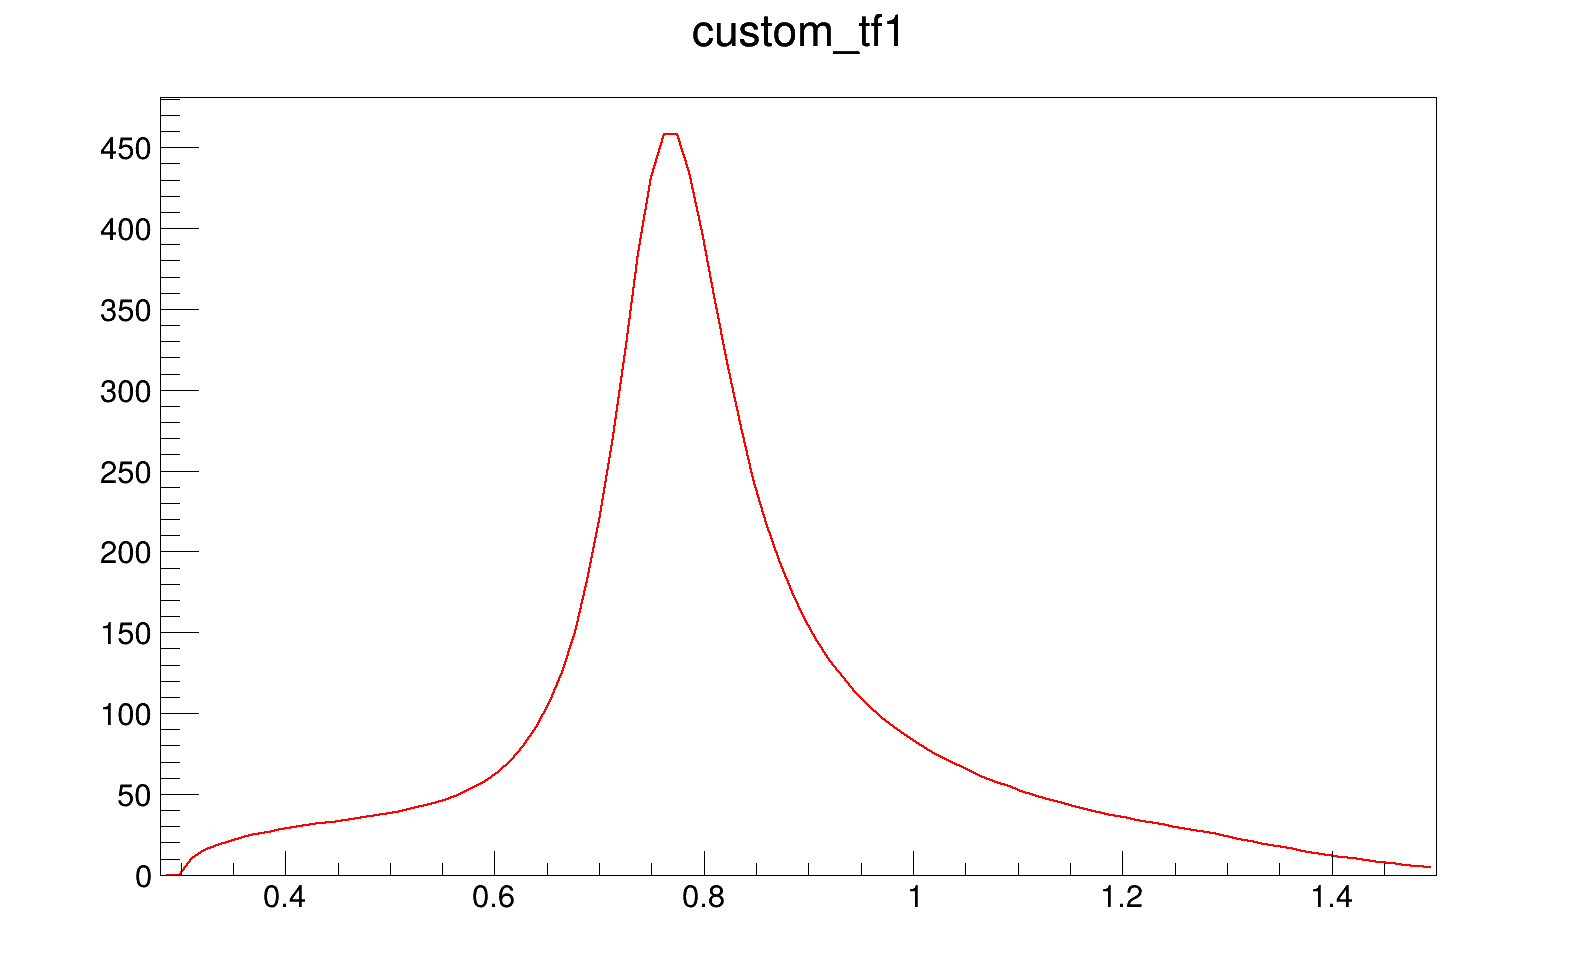

0.304738 20.5915 0.03404
0.857245
22.6411
0.427285 22.6411 0.0349438
0.829238
24.3547
0.579152 24.3547 0.0358839
0.801696
25.8059
0.765396 25.8059 0.0368623
0.77462
27.0427
0.99204 27.0427 0.0378811
0.748009
28.0992
1.26628 28.0992 0.0389426
0.721863
29.0005
1.59673 29.0005 0.0400492
0.696182
29.7657
1.99376 29.7657 0.0412034
0.670966
30.4102
2.46987 30.4102 0.0424081
0.646215
30.9461
3.04026 30.9461 0.0436661
0.621929
31.3838
3.72343 31.3838 0.0449806
0.598109
31.7316
4.54213 31.7316 0.0463552
0.574754
31.997
5.52437 31.997 0.0477934
0.551863
32.1862
6.70499 32.1862 0.0492993
0.529438
32.3046
8.12751 32.3046 0.0508771
0.507478
32.3571
9.84673 32.3571 0.0525315
0.485983
32.348
11.9322 32.348 0.0542675
0.464954
32.2811
14.4726 32.2811 0.0560905
0.444389
32.16
17.5826 32.16 0.0580063
0.424289
31.9876
21.4105 31.9876 0.0600214
0.404655
31.7669
26.1507 31.7669 0.0621427
0.385486
31.5006
32.0592 31.5006 0.0643778
0.366782
31.191
39.4755 31.191 0.0667348
0.348543
30.8403
48.8514 30.8403 0.06

In [1]:
%reset -f 
import ROOT
import cppyy

def relativistic_breit_wigner(x, par):
    
    pi = ROOT.TMath.Pi()
    m = x[0]
    amp = par[0]
    M0 = par[1]
    G0 = par[2]
    mpi = 0.13957
    
    
    p = ROOT.TMath.Sqrt(m*m-4*mpi*mpi)/4
    p0 = ROOT.TMath.Sqrt(M0*M0-4*mpi*mpi)/4
    
    Gamma = G0*(p/p0)*(p/p0)*(p/p0)
    
    gamma = ROOT.TMath.Sqrt(m*m*(M0*M0+Gamma*Gamma))
    
    k1 = 2*ROOT.TMath.Sqrt(2)*Gamma*gamma
    k2 = pi*ROOT.TMath.Sqrt(M0*M0)+gamma
    k = k1/k2
    
    func = amp*k/((m*m-M0*M0)*(m*m-M0*M0)+(Gamma*Gamma*M0*M0))
    #print(func)
    return func
def bkg_func(x,par):
    amp = par[0]
    xi = par[1]
    m0 = par[2]
    m1 = par[3]
    
    A1 = m1-x[0]
    A2 = (m1-m0)*(m1-m0)
    A = A1/A2
    
    B1 = (m1-x[0])*(m1-x[0])
    B2 = (m1-m0)*(m1-m0)
    B = B1/B2
    
    C1 = (m1-x[0])*(m1-x[0])
    C2 = (m1-m0)*(m1-m0)
    C = C1/C2
    
    
    func = amp*xi*xi*xi*A*ROOT.TMath.Sqrt(1-B)*ROOT.TMath.Exp(-1/2*xi*xi*(1-C))
    
    return func
def sum_function(x, par):
    amp_rho = par[0]
    M0_rho = par[1]
    Gamma_rho = par[2]
    
    amp_f2 = par[3]
    M0_f2 = par[4]
    Gamma_f2 = par[5]
    
    
    bkg_1 = par[6]
    bkg_2 = par[7]
    bkg_3 = par[8]
    bkg_4 = par[9]
    
    
    #return bkg_func(x,[bkg_1,bkg_2,bkg_3])
    return relativistic_breit_wigner(x,[amp_rho,M0_rho,Gamma_rho]) + relativistic_breit_wigner(x, [amp_f2,M0_f2,Gamma_f2]) + bkg_func(x,[bkg_1,bkg_2,bkg_3,bkg_4])
    

cppyy.cppdef("""
double breit_wigner_1(double *x, double *par) {
    double m = x[0];
    double amp = par[0];
    double m0 = par[1];
    double G0 = par[2];
    double mpi = 0.139; // Mass of pi+

    double p = TMath::Sqrt(m*m-4*mpi*mpi)/2;
    double p0 = TMath::Sqrt(m0*m0-4*mpi*mpi)/2;
    double Gamma = G0*TMath::Power(p / p0, 3);
    double gamma = TMath::Sqrt(m*m*(m0*m0 + Gamma*Gamma));
    
    double k1 = 2 * TMath::Sqrt(2) *m0* Gamma * gamma;
    double k2 = TMath::Pi() * TMath::Sqrt(m0*m0 + gamma);
    double k = k1 / k2;
    
    double bw1 = amp * k / ((m*m - m0*m0)*(m*m - m0*m0) + (Gamma*Gamma*m0*m0));
    return bw1;
}
    
""")

cppyy.cppdef("""
            double breit_wigner_2(double *x, double *par) {
            double m = x[0];
            double amp = par[7];
            double mu = par[8];
            double gamma = par[9];
            
            /*double m0 = par[8];
            double G0 = par[9];
            double mpi = 0.139; // Mass of pi+

            double p = TMath::Sqrt(m*m-4*mpi*mpi)/2;
            double p0 = TMath::Sqrt(m0*m0-4*mpi*mpi)/2;
            double Gamma = G0*TMath::Power(p / p0, 1);
            double gamma = TMath::Sqrt(m*m*(m0*m0 + Gamma*Gamma));

            double k1 = 2 * TMath::Sqrt(2) * Gamma * gamma;
            double k2 = TMath::Pi() * TMath::Sqrt(m0*m0 + gamma);
            double k = k1 / k2;

            double bw1 = amp * k / ((m*m - m0*m0)*(m*m - m0*m0) + (Gamma*Gamma*m0*m0));
            return bw1;*/
            
            return amp*TMath::BreitWigner(m, mu, gamma);
            

            }
    """)

cppyy.cppdef("""
double background(double *x, double *par) {
    double m = x[0];
    double amp_bkg = par[3];
    double xi = par[4];
    double m0_bkg = par[5];
    double m1_bkg = par[6];
    
    double A1 = m1_bkg-m;
    double A2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
    double A = A1/A2;
    
    double B1 = (m1_bkg-m)*(m1_bkg-m);
    double B2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
    double B = B1/B2;
    
    double C1 = (m1_bkg-m)*(m1_bkg-m);
    double C2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
    double C = C1/C2;
    
    double func;
    std::cout << B << endl;
    if(B < 1){
        func = amp_bkg*xi*xi*xi*A*TMath::Sqrt(1-B)*TMath::Exp(-1/2*xi*xi*(1-C));
    } else {
        func = 0;
    }
    std::cout << func << endl;
    return func;
}
""")

cppyy.cppdef("""
double background_only(double *x, double *par) {
    double m = x[0];
    double amp_bkg = par[0];
    double xi = par[1];
    double m0_bkg = par[2];
    double m1_bkg = par[3];
    
    double A1 = m1_bkg-m;
    double A2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
    double A = A1/A2;
    
    double B1 = (m1_bkg-m)*(m1_bkg-m);
    double B2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
    double B = B1/B2;
    
    double C1 = (m1_bkg-m)*(m1_bkg-m);
    double C2 = (m1_bkg-m0_bkg)*(m1_bkg-m0_bkg);
    double C = C1/C2;
    
    double func;
    //std::cout << B << endl;
    if(B < 1){
        func = amp_bkg*xi*xi*xi*A*TMath::Sqrt(1-B)*TMath::Exp(-1/2*xi*xi*(1-C));
    } else {
        func = 0;
    }
    //std::cout << func << endl;
    return func;
}
""")



cppyy.cppdef("""
        #include <cmath>
        #include "TMath.h"
        
        double total_function(double *x, double *par) {
        double m = x[0];
        double amp1 = par[0];
        double m01 = par[1];
        double G01 = par[2];


        double amp_bkg = par[3];
        double xi = par[4];
        double m0_bkg = par[5];
        double m1_bkg = par[6];
        
        double amp2 = par[7];
        double m02 = par[8];
        double G02 = par[9];

        // Evaluate the first Breit-Wigner function
        double bw1 = breit_wigner_1(x, par);

        double bkg = background(x,par);
        
        double bw2 = breit_wigner_2(x, par);

        std::cout << bw1 << " " << bkg << " " << bw2 << endl;
        // Return the sum of the two Breit-Wigner functions and the background
        return bw1+ bkg + bw2;
        }
    """)


# Create the TF1 object using the defined function
custom_tf1 = ROOT.TF1("custom_tf1", cppyy.gbl.total_function, 0.28, 1.5, 10)
#custom_tf1 = ROOT.TF1("custom_tf1", cppyy.gbl.breit_wigner_1, 0.28, 1, 3)

#custom_tf1 = ROOT.TF1("custom_tf1", cppyy.gbl.background_only, 0.28, 1, 10)


# Set initial parameter values for A, B, and C
custom_tf1.SetParameters(100, 0.777,0.15,10,1.73,0.3,1.1,1,1.275,0.186)
#custom_tf1.SetParameters(100, 0.777,0.15)

#custom_tf1.SetParameters(1.043,8.56,0.3,10)

#custom_tf1.SetParameters(22.615011711080157,0.79,9.8, 0.555,1.7,0.012,0.11, 0.0,1.2,0.1)

#custom_tf1.SetParameters(10, 1.3, 0.29, 1.0)
c1 = ROOT.TCanvas("c1","c1", 1600,1000)
c1.Divide(1,1,.001,0.001)
c1.Draw()
# Now you can use custom_tf1 in your analysis
custom_tf1.Draw()

In [5]:
tbinNum = 0
Q2binNum = 2
phiCount = 7

def PrintFile(Q2binNum,tbinNum,phiCount):
    txtFile = "/w/hallb-scshelf2102/clas12/trottan/rhoAnalysis/rhoFits_andrey/Fits.fitted.hists.mmp-lt-110.bin" + str(Q2binNum) + str(tbinNum) + ".root.txt"
    fitPar = []
    print(txtFile)
    parCount = phiCount*20
    with open(txtFile,'r') as file_temp:
        line = file_temp.readlines()
        for i in range(parCount,parCount + 20):
            #print(float(line[i]))
            fitPar.append(float(line[i]))
            phiCount +=1
    print(fitPar)
    
PrintFile(0,3,2)
PrintFile(0,3,3)

/w/hallb-scshelf2102/clas12/trottan/rhoAnalysis/rhoFits_andrey/Fits.fitted.hists.mmp-lt-110.bin03.root.txt
[10.594031604549189, 0.7907587944512802, 0.16573930718835886, 9.121813228043676, 1.3089974743914559, 0.4527446250567011, 29.073323630595283, 0.10000025480787944, 0.29999999999633215, 9.999999656324823, 5.652672168613865, 0.7907587944512802, 0.16573930718835886, 7.570498868894986, 1.3089974743914559, 0.4527446250567011, 43.60998536756536, 0.10000025480787944, 0.29999999999633215, 9.999999656324823]
/w/hallb-scshelf2102/clas12/trottan/rhoAnalysis/rhoFits_andrey/Fits.fitted.hists.mmp-lt-110.bin03.root.txt
[15.65813665477981, 0.780288406333529, 0.16208230357164116, 10.069937184655775, 1.2570853781658429, 0.3747740216262425, 14.488213194133955, 0.1000002521738358, 0.2999999968696451, 2.9336505738596252, 13.315719827330883, 0.780288406333529, 0.16208230357164116, 9.317088093455173, 1.2570853781658429, 0.3747740216262425, 14.623265491941021, 0.1000002521738358, 0.2999999968696451, 2.9336

In [6]:
Q2bins = ["Q2 >2 && Q2 < 4 && Q2 > 14.8*xb-1.22","Q2 >2 && Q2 < 4 && Q2 > 14.8*xb-2.108"]
Q2bins += ["Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108"]
Q2bins += ["Q2 > 4 && Q2 > 14.8*xb-1.368", "Q2 > 4 && Q2 < 14.8*xb-1.368"]
print(len(Q2bins))

tbins= [["mt < 0.25", "mt > 0.25 && mt < 0.4","mt > 0.4 && mt < 0.6","mt > 0.6 && mt < 1.1"]]
tbins += [["mt < 0.28", "mt > 0.28 && mt < 0.45","mt > 0.45 && mt < 0.65","mt > 0.65 && mt < 1.1"]]
tbins += [["mt < 0.4", "mt > 0.4 && mt < 0.65","mt > 0.65 && mt < 1.3"]]
tbins += [["mt < 0.7", "mt > 0.7 && mt < 1.6"]]
tbins += [["mt < 1.1", "mt > 1.1 && mt < 2"]]




5


In [8]:
cut2 = rdf.Filter("mmpro < 1.1 && mmpro > 0.85")
Q2bins = ["Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108"]
Q2bins += ["Q2 > 4 && Q2 > 14.8*xb-1.368"]
Q2bins += ["Q2 > 4 && Q2 < 14.8*xb-1.368"]
print(len(Q2bins))

# tbins= [["mt < 0.25", "mt > 0.25 && mt < 0.4","mt > 0.4 && mt < 0.6","mt > 0.6 && mt < 1.1"]]
# tbins += [["mt < 0.28", "mt > 0.28 && mt < 0.45","mt > 0.45 && mt < 0.65","mt > 0.65 && mt < 1.1"]]
tbins = [["mt < 0.4", "mt > 0.4 && mt < 0.65","mt > 0.65 && mt < 1.3"]]
tbins += [["mt < 0.7", "mt > 0.7 && mt < 1.6"]]
tbins += [["mt < 1.1", "mt > 1.1 && mt < 2"]]




Q2Count = 0
tCount = 0
phiCount = 0

for i in Q2bins:
    #Q2cut = cut2.Filter(i)
    for j in tbins[Q2Count]:
        #tcut = Q2cut.Filter(j)
        for k in range(0,9):
            phi_min = 0 + 40*phiCount
            phi_max = 40 + 40*phiCount
            print(i,j,phi_min,phi_max)
            #phiCut = tcut.Filter("phi_t > " + phi_min + "phi_t < "+ phi_max)
            phiCount +=1
        tCount +=1
        phiCount = 0
    Q2Count +=1
    tCount = 0
    
Q2Count = 0
tCount = 0
phiCount = 0

print("Entering Loop")

eps = []
for i in Q2bins:
    Q2cut = cut2.Filter(i)
    for j in tbins[Q2Count]:
        tcut = Q2cut.Filter(j)
        print(i,j)
        y = tcut.Mean("y").GetValue()
        gamma = tcut.Mean("gamma").GetValue()
        A = 1-y-1/4*gamma*gamma*y*y
        print(A)
        B = 1-y+1/2*y*y+(1/4*gamma*gamma*y*y)
        print(B)
        eps.append(A/B)
        tCount +=1
        phiCount = 0
#         if tCount == 1:
#             break
    Q2Count +=1
    tCount = 0
#     if Q2Count == 1:
#         break
print(eps)

3
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt < 0.4 0 40
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt < 0.4 40 80
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt < 0.4 80 120
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt < 0.4 120 160
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt < 0.4 160 200
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt < 0.4 200 240
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt < 0.4 240 280
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt < 0.4 280 320
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt < 0.4 320 360
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt > 0.4 && mt < 0.65 0 40
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt > 0.4 && mt < 0.65 40 80
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt > 0.4 && mt < 0.65 80 120
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt > 0.4 && mt < 0.65 120 160
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt > 0.4 && mt < 0.65 160 200
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt > 0.4 && mt < 0.65 200 240
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 mt > 0.4 && mt < 0.65 240 280
Q2 >2 && Q2 < 4 && Q2 < 14.8*xb-2.108 m

In [1]:
rhoAmp = [[[5.297854662744683, 5.504845433379479], [6.9643330052882035, 5.771665040898988], [7.967679755971346, 6.284008989831946], [17.41824504741807, 17.130567803724794], [6.81836912708178, 7.503927771379537], [6.872464630713893, 6.6592777359097965], [5.2031140085340155, 5.487898664946478], [5.6403700970930615, 5.865576512831261], [4.85370461600354, 4.114007012834264]], [[21.9912829890756, 20.785704544779016], [27.731731144231553, 24.713497709383248], [18.54296781567122, 16.247370260846772], [16.70824391453163, 17.046207233528676], [15.432022141270707, 16.90589361724726], [16.927403748701053, 17.118103343705116], [12.005086146849031, 14.05157598333151], [12.138256227367528, 12.243691797086953], [22.962682488802955, 22.45738456252422]], [[18.201918925986327, 17.843136215778266], [44.3976037894922, 40.645206151879165], [26.701097938786056, 24.883117714091796], [26.112493445862306, 23.34459450470394], [20.975649503429672, 24.45159137220987], [22.536948047213734, 22.468824479870975], [18.572686362183788, 19.178070072567444], [32.75352631282313, 33.73606063339363], [16.543080318398573, 13.990378284201022]], [[1.1468797828095845, 1.1673467414929917], [3.7876328201624787, 2.51807195261744], [5.018108964471857, 3.745413622580074], [5.007442928639527, 4.3359658835617765], [6.197565832199992, 6.644794262600229], [5.269838605492794, 6.371578777364384], [3.748741115305876, 5.286316055452822], [1.9438540155292117, 2.9947329949209234], [1.1323276333241594, 1.2785600811415776]], [[0.48654927975455564, 0.6253600509653623], [2.307711045590466, 1.8681709668122437], [4.066506982258744, 3.337622554444586], [5.166464543959748, 4.1144162588047095], [5.039465778011731, 5.4446624231374585], [4.89644141954404, 5.008553666807636], [2.9642676813157465, 3.5053925068195824], [2.4482744837017734, 2.279228324408855], [0.16603485697430642, 0.3881519067272521]], [[10.343038930327175, 9.663239262103218], [10.600109872638264, 10.826158006183029], [13.134558524141582, 12.914985911272048], [16.082481698598272, 16.20201743213201], [11.820749415414333, 12.503203349889525], [16.562594901126104, 16.949790288545152], [12.257253607650398, 12.92669811359115], [6.779025774061864, 7.800163317472908], [4.152768711684907, 4.61250964201021]], [[3.8439579908011723, 4.450804631517258], [12.664039285570361, 11.771341532629265], [20.681479130368885, 21.077585204420934], [25.331593790922646, 26.1003417229011], [28.96429797116795,27.878925348279182], [14.311880688344658,13.35126911694573], [20.643720431423596, 20.181483670889122], [16.91453557106648, 16.30399055818632], [10.293564789987109, 10.792470059861614]]]
rhoAmpError = [[[0.3818559607404737, 0.40269205192622337], [0.44183200376135545, 0.4009628964962708], [0.3811541629539228, 0.4489803570595363], [0.4713093845754024, 0.4772225156712828], [0.40279983126723096, 0.37796703378223384], [0.4055110622291913, 0.4110760273845493], [0.36932121694199793, 0.3836582249117093], [0.38315472516980975, 0.4127538802412012], [0.36386992030568166, 0.33562364942785194]], [[0.41988444388074697, 0.41417709428781535], [0.508236716045829, 0.47905328648401024], [0.7918555142150119, 0.9461976227531643], [0.7981984784244389, 0.6947079425612124], [0.5867629065958724, 0.5888117624031075], [0.8158386843870602, 0.9321186333899334], [0.6062804092099583, 0.6154810253122811], [0.6072750541319394, 0.6481239353539614], [0.4969836947532613, 0.472611508539611]], [[0.5844275188793269, 0.5803683619798328], [2.0767958974765577, 2.1242197179027755], [0.993682763295034, 0.9754130866901356], [0.8571453560812792, 0.98053625913197], [0.9544263632199623, 0.8112486185596346], [0.8829138070653997, 0.9080322047050338], [0.865034430752587, 0.8353659614046549], [2.357217298853964, 2.2262183935195523], [0.619139594870699, 0.6051403980689152]], [[0.20831583930069897, 0.18354121361641162], [0.29548894442399387, 0.2632255513557169], [0.30078071644457083, 0.2615699429275864], [0.31684707246792954, 0.2885132829866244], [0.013683324473490188, 0.01390393855604799], [0.02467381077231323, 0.026655074536474643], [0.28019498776732377, 0.3115873939418812], [0.22707341479355492, 0.2750799021900008], [0.0634787494790956, 0.06808308750105851]], [[0.42502767277907694, 0.5157350471685085], [0.3921914965010487, 0.39994498657325295], [0.33250449199551113, 0.30941987472221655], [0.3485898558697187, 0.30776618503702835], [0.306880994782599, 0.2579811905767393], [0.33880532740449, 0.3466010789487939], [0.28368047327864687, 0.31807171396724954], [0.3680460664012841, 0.41622796542739593], [0.07752961717066853, 0.10768285485518447]], [[0.2978987542756606, 0.28265685986239575], [0.26956169490999216, 0.2943633978236271], [0.3161147710262213, 0.3133907591768015], [0.3547815063953408, 0.36181658946699], [0.6935375834737911, 0.684296183051103], [0.36920260459982757, 0.3627582850773692], [0.3088299127540495, 0.32881250555671926], [0.6416140932441472, 0.44743425658966274], [0.27853163026003713, 0.2802955081926406]], [[0.32952042677836246, 0.3391880842862349], [0.8768445133866543, 0.8149292402004349], [0.46926514313261336, 0.48074083630611497], [0.6062299293119189, 0.6244685027412267], [0.5508311307078628,0.5399442074005556], [0.7308710497921922,0.767897723186195], [0.5398407321166587, 0.5140655917612591], [0.5107329745235312, 0.4937384823211488], [0.5216635654003987, 0.636860849334564]]]
eps = [0.8917327727578273, 0.8923300453149475, 0.8907049765144222, 0.573601931567503, 0.5630835647445778, 0.778307742494498, 0.7831276144636491]


print(len(rhoAmp),len(rhoAmpError),len(eps))



7 7 7


In [2]:
import numpy as np
Pb = 0.8692
# rhoAmp = [[[6.882412755815359, 6.180844966952037], [10.387965722613579, 8.49990159201841]]]
# rhoAmpError =[[[0.32705471275651377, 0.3274549292830997], [0.28356682252317356, 0.33383348974069804]]]



print(len(rhoAmp),len(rhoAmp[0]),len(rhoAmp[0][0]))
BSA = []

for i in rhoAmp:
    BSA_tBins = []
    for k in i:
        A  = k[1] - k[0]
        B = k[1] + k[0]
        BSA_tBins.append(1/Pb*(A/B))
        #print(k, " = ", 1/Pb*A/B)
    BSA.append(BSA_tBins)
BSAError = []
     
for i in range(0,len(rhoAmp)):
    BSAError_tBins = []
    for j in range(0,len(rhoAmp[0])):
        A = (4*(rhoAmp[i][j][1])**2/((rhoAmp[i][j][1]+rhoAmp[i][j][0])**4))*rhoAmpError[i][j][0]**2
        B = (4*(rhoAmp[i][j][0])**2/((rhoAmp[i][j][1]+rhoAmp[i][j][0])**4))*rhoAmpError[i][j][1]**2
        BSAError_tBins.append(1/Pb*np.sqrt(A+B))
    BSAError.append(BSAError_tBins)


for i in range(0,len(eps)):
    for j in range(0,len(BSA[i])):
        BSA[i][j] = BSA[i][j]/np.sqrt(2*eps[i]*(1-eps[i]))
        BSAError[i][j] = BSAError[i][j]/np.sqrt(2*eps[i]*(1-eps[i]))
print(BSA)
print(BSAError)
# print(len(BSA))
# BSA = 1/Pb*(Np-Nm)/(Nm+Np)
# #eBSA = 2/Pb * np.sqrt(Np*Nm/(Np+Nm)**3)
# eBSA = 1/Pb*np.sqrt(4*((Nm)**2/((Nm+Np)**4))*Np_e**2 + 4*((Np)**2/((Nm+Np)**4))*Nm_e**2)

7 9 2
[[0.050166993578958166, -0.24518053227797487, -0.3093073610022443, -0.021800768001786146, 0.12532316439019234, -0.04124831350869284, 0.06974244291355103, 0.05124574573546344, -0.21595933940612896], [-0.07396743151989917, -0.15104352141018293, -0.17317785882888873, 0.026278088871746656, 0.1196197388426762, 0.01470094405349914, 0.20613231077649624, 0.011349428918864443, -0.02919812787042542], [-0.02595278465545596, -0.11504543846636249, -0.09189047038425756, -0.14592168616758489, 0.19950523509549548, -0.003946638175908238, 0.041812219708827716, 0.03852939997925992, -0.21798282417707993], [0.014547883467049884, -0.33118622233342004, -0.23889007778116192, -0.11821652439308569, 0.05728447382976255, 0.15567744392454183, 0.2799353567648996, 0.3500276585069417, 0.09977440201124604], [0.2047545024396276, -0.17263542978523422, -0.1614597708147002, -0.18592001505899927, 0.06338889570539553, 0.01856429502225385, 0.13718153445014789, -0.058647996506852644, 0.6573632416194066], [-0.06654707801

0
1
2
3
4
5
6
0.050166993578958166 20 0 0
-0.24518053227797487 60 1 0
-0.3093073610022443 100 2 0
-0.021800768001786146 140 3 0
0.12532316439019234 180 4 0
-0.04124831350869284 220 5 0
0.06974244291355103 260 6 0
0.05124574573546344 300 7 0
-0.21595933940612896 340 8 0




-0.07396743151989917 20 0 1
-0.15104352141018293 60 1 1
-0.17317785882888873 100 2 1
0.026278088871746656 140 3 1
0.1196197388426762 180 4 1
0.01470094405349914 220 5 1
0.20613231077649624 260 6 1
0.011349428918864443 300 7 1
-0.02919812787042542 340 8 1




Bad bin
-0.11504543846636249 60 1 2
-0.09189047038425756 100 2 2
-0.14592168616758489 140 3 2
0.19950523509549548 180 4 2
-0.003946638175908238 220 5 2
0.041812219708827716 260 6 2
0.03852939997925992 300 7 2
Bad bin




0.014547883467049884 20 0 3
-0.33118622233342004 60 1 3
-0.23889007778116192 100 2 3
-0.11821652439308569 140 3 3
0.05728447382976255 180 4 3
0.15567744392454183 220 5 3
0.2799353567648996 260 6 3
0.3500276585069417 300 7 3
0.09977440201124604 34

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file BSA_2_3_4.pdf has been created


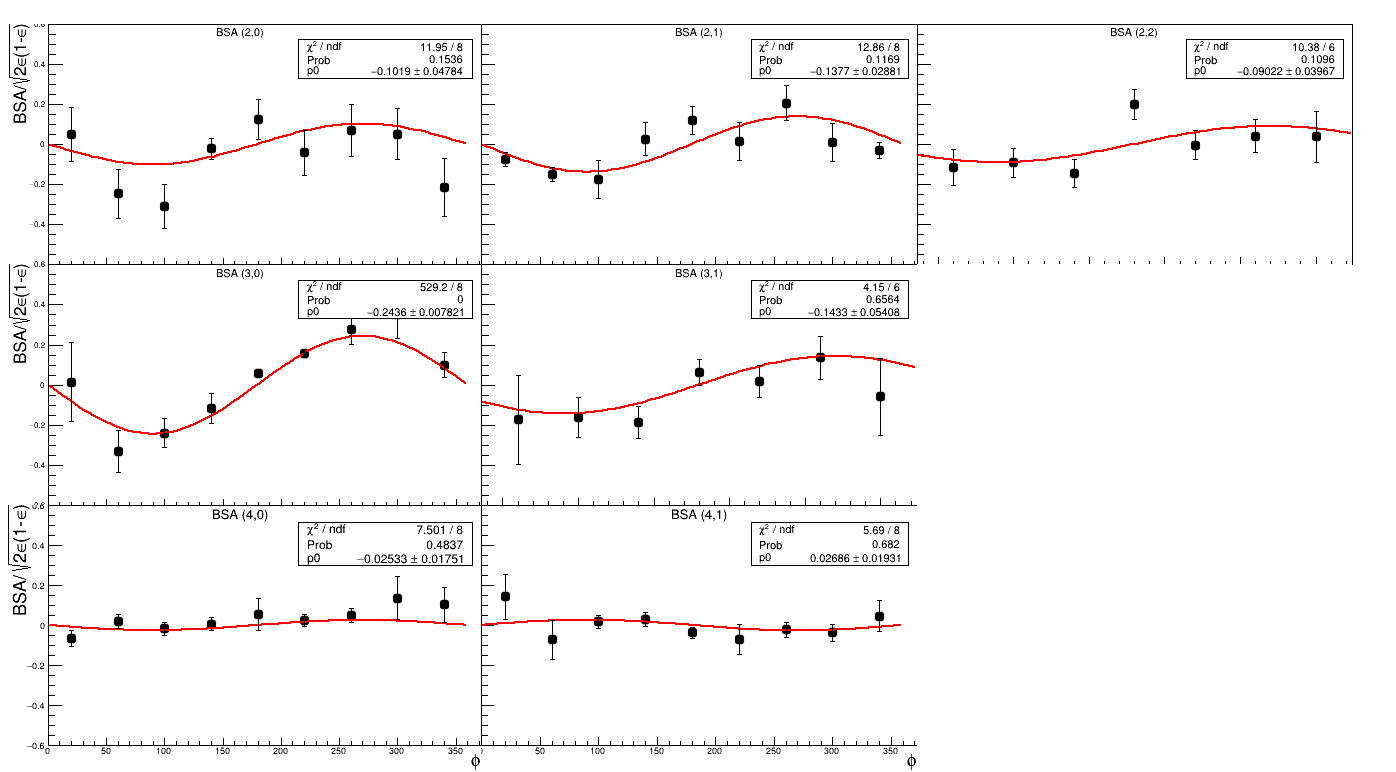

In [17]:
import ROOT
ROOT.gStyle.SetOptStat(1111)  # Enable all statistics
ROOT.gStyle.SetOptFit(1111)   # Enable detailed fit statistics


trePhi = [20,60,100,140,180,220,260,300,340]
hBSA =[]

for i in range(0,7):
    print(i)
    hBSA.append(ROOT.TGraphErrors())

    
parsFit = np.zeros((7))
parsFitError = np.zeros((7))
countOut = 0
for i in BSA:
    count = 0
    for x in i:
        if (countOut ==2 or countOut == 4) and  (count ==0 or count == 8): 
            print("Bad bin")
        else:
            y = trePhi[count]
            yerr = BSAError[countOut][count]
            hBSA[countOut].SetPoint(hBSA[countOut].GetN(),y,x)
            print(x,y,count,countOut)
            hBSA[countOut].SetPointError(hBSA[countOut].GetN()-1, 0, yerr)
            t1= ROOT.TF1("f1","[0]*sin(x*TMath::DegToRad())",0,360)
            #t1= ROOT.TF1("f1","([0]*sin(x*TMath::DegToRad()))/(1+[1]*cos(x*TMath::DegToRad())+[2]*cos(2*x*TMath::DegToRad()))",0,360)
            #t1.SetParameter(0,1e-2)
            hBSA[countOut].Fit(t1,"QR")
            parsFit[countOut] = t1.GetParameter(0)
            parsFitError[countOut] = t1.GetParError(0)
        count += 1
    countOut += 1 
    print("\n\n\n")
c4 = ROOT.TCanvas("c1","c1", 1400,800)
c4.Divide(3,3,0,0)
c4.Draw()

Q2BinCount = 2
tCount = 0

for i in hBSA:
    i.SetTitle("BSA (" + str(Q2BinCount) + ","+ str(tCount) + ")")
    tCount += 1
    if Q2BinCount == 2 and tCount ==3:
        Q2BinCount += 1
        tCount = 0
    elif Q2BinCount == 3 and tCount == 2:
        Q2BinCount += 1
        tCount = 0


j = 1
for i in range(0,7):
    if i == 5:
        j+=1
    print(j)
    c4.cd(j)
    hBSA[i].GetYaxis().SetRangeUser(-0.6,0.6)
    hBSA[i].SetMarkerSize(1)
    hBSA[i].SetMarkerStyle(107)
    hBSA[i].GetXaxis().SetTitleSize(0.075)
    hBSA[i].GetXaxis().SetTitleOffset(0.5)
    hBSA[i].GetXaxis().SetTitle("#phi")
    hBSA[i].GetYaxis().SetTitleSize(0.075)
    hBSA[i].GetYaxis().SetTitleOffset(0.5)
    hBSA[i].GetYaxis().SetTitle("BSA/#sqrt{2#epsilon(1-#epsilon)}")
    hBSA[i].Draw("AP")
    j+=1
c4.SaveAs("BSA_2_3_4.pdf")

[-0.10186907 -0.13769048 -0.09022226 -0.24355498 -0.14334093 -0.02532882
  0.02685794]
[0.0478361  0.02880952 0.03967162 0.00782058 0.05408385 0.01751073
 0.01930756]
0.31435451904318035 -0.0967260173717357 0.045480689564015464
0.5256207459743392 -0.13106214021147355 0.027017058023807328
0.935910513527791 -0.07878014429087832 0.03931837880008371

0.4804298954252684 -0.24988868925245555 0.045052326436366086
1.1137714326926043 -0.15341259694967924 0.04536596087021694

0.7890173032610954 -0.08145362831993064 0.034318918508519536
1.522503225222938 0.018001192318751524 0.037887964747871095

0 0 -0.1018690740702686 0.31435451904318035 0 7
0 1 -0.13769047760195569 0.5256207459743392 1 7
0 2 -0.09022225900201995 0.935910513527791 2 7
1 3 -0.24355498079745197 0.4804298954252684 3 7
1 4 -0.14334092883404337 1.1137714326926043 4 7
2 5 -0.02532881563744498 0.7890173032610954 5 7
2 6 0.026857939612637962 1.522503225222938 6 7


/scratch/slurm/22758597/ipykernel_868656/327813412.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sig = np.array([
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file sig_2_3_4.pdf has been created


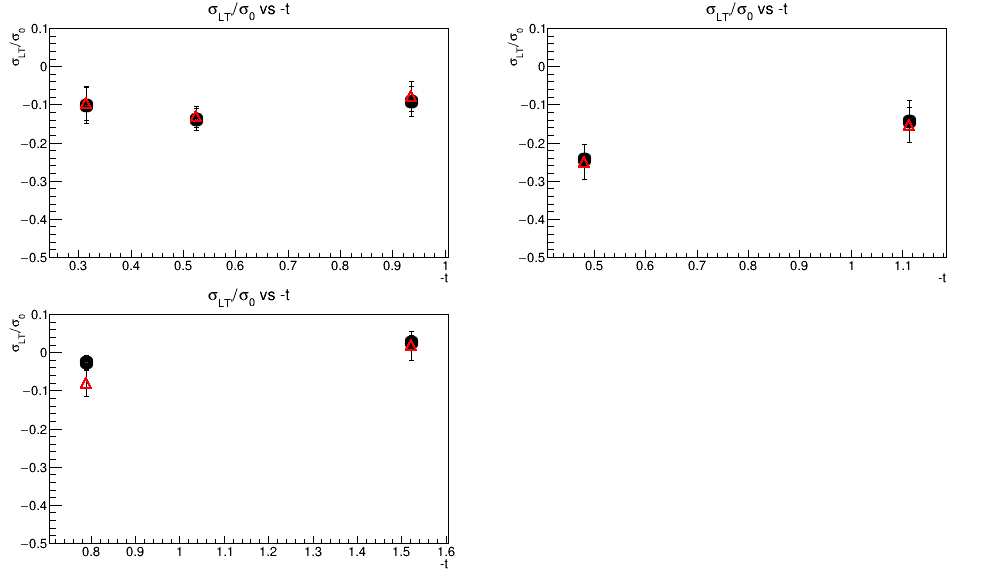

In [15]:
print(parsFit)
print(parsFitError)
sig = np.array([
((2, 0, 0.31435451904318035, -0.0967260173717357, 0.045480689564015464),
(2, 1, 0.5256207459743392, -0.13106214021147355, 0.027017058023807328),
(2, 2, 0.935910513527791, -0.07878014429087832, 0.03931837880008371)),

((3, 0, 0.4804298954252684, -0.24988868925245555, 0.045052326436366086),
(3, 1, 1.1137714326926043, -0.15341259694967924, 0.04536596087021694)),

((4, 0, 0.7890173032610954, -0.08145362831993064, 0.034318918508519536),
(4, 1, 1.522503225222938, 0.018001192318751524, 0.037887964747871095))     
])

Tavg = [ 0.31435451904318035,0.5256207459743392,0.935910513527791,0.4804298954252684,1.1137714326926043,0.7890173032610954,1.522503225222938]


hWSPhi = []
for i in range(0,3):
    hWSPhi.append(ROOT.TGraphErrors())

hSig_mt = []
for i in range(0,5):
    hSig_mt.append(ROOT.TGraphErrors())
    
    
    
    
for j,k in zip(sig,hSig_mt):
    for i in (j):
        x = i[2]
        y = i[3]
        yerr = i[4]
        print(x,y,yerr)
        k.SetPoint(k.GetN(),x,y)
        k.SetPointError(k.GetN()-1, 0, yerr)
    print()

count = 0
for i in range(0,len(hWSPhi)):
    if i == 0:
        mini = 0
        maxi = 3
    elif i == 1:
        mini = 3
        maxi = 5
    elif i ==2:
        mini = 5
        maxi = 7
    
    for x in range(mini,maxi):
        y =  Tavg[count]
        yerr = parsFitError[count]
        hWSPhi[i].SetPoint(hWSPhi[i].GetN(),y,parsFit[x])
        print(i,x,parsFit[x],y,count,countOut)
        hWSPhi[i].SetPointError(hWSPhi[i].GetN()-1, 0, yerr)
        count = count + 1
        t1= ROOT.TF1("f1","pol2(0)",0,360)
        t1.SetParameter(0,1e5)
        #hWSPhi.Fit(t1,"QR")
c4 = ROOT.TCanvas("c1","c1", 1000,600)
c4.Divide(2,2,0.00001,0.00001)
c4.Draw()

ROOT.gStyle.SetTitleFontSize(0.05)


for i in range(0,len(hWSPhi)):
    c4.cd(i+1)
    hWSPhi[i].SetTitle("#sigma_{LT'}/#sigma_{0} vs -t")


    hWSPhi[i].GetXaxis().SetRangeUser(0,1.7)
    hWSPhi[i].GetXaxis().SetTitle("-t")


    hWSPhi[i].GetXaxis().SetLabelSize(0.05)
    hWSPhi[i].GetXaxis().SetTitleSize(0.05)
    hWSPhi[i].GetXaxis().SetTitleOffset(0.9)

    hWSPhi[i].GetYaxis().SetRangeUser(-0.5,0.1)
    hWSPhi[i].GetYaxis().SetTitle("#sigma_{LT'}/#sigma_{0}")
    hWSPhi[i].GetYaxis().SetLabelSize(0.05)
    hWSPhi[i].GetYaxis().SetTitleSize(0.05)
    hWSPhi[i].GetYaxis().SetTitleOffset(0.8)

    hWSPhi[i].SetMarkerSize(1.5)
    hWSPhi[i].SetMarkerStyle(107)
    hWSPhi[i].Draw("AP")
    hSig_mt[i].SetMarkerSize(1.5)
    hSig_mt[i].SetMarkerStyle(55)
    hSig_mt[i].SetMarkerColor(2)
    hSig_mt[i].Draw("P")
c4.SaveAs("sig_2_3_4.pdf")